# Telecom churn case study

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
import matplotlib.animation as animation
import seaborn as sns
import math
from IPython.display import Markdown, display ,HTML
from sklearn.model_selection import train_test_split

# filtering out warnings 
import warnings
warnings.filterwarnings('ignore')


In [2]:
# for the best fit of columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

In [3]:
# importing the dataset
tel_data = pd.read_csv("telecom_churn_data.csv")

In [4]:
tel_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
tel_data.shape

(99999, 226)

In [6]:
tel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
tel_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [8]:
# Importing the dictionary xls file.
tel_data_dic = pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")
tel_data_dic

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belongs to
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mobile to mobile)"
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


In [9]:
tel_data.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,99999.0,7.001207e+09,695669.386290,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002411e+09
circle_id,99999.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
arpu_6,99999.0,2.829874e+02,328.439770,-2.258709e+03,9.341150e+01,1.977040e+02,3.710600e+02,2.773109e+04
arpu_7,99999.0,2.785366e+02,338.156291,-2.014045e+03,8.698050e+01,1.916400e+02,3.653445e+02,3.514583e+04
arpu_8,99999.0,2.791547e+02,344.474791,-9.458080e+02,8.412600e+01,1.920800e+02,3.693705e+02,3.354362e+04
arpu_9,99999.0,2.616451e+02,341.998630,-1.899505e+03,6.268500e+01,1.768490e+02,3.534665e+02,3.880562e+04
onnet_mou_6,96062.0,1.323959e+02,297.207406,0.000000e+00,7.380000e+00,3.431000e+01,1.187400e+02,7.376710e+03


In [10]:
# checking the unique values and droping columns with value 1
unique_1_col=[]
for i in tel_data.columns:
    if tel_data[i].nunique() == 1:
        unique_1_col.append(i)
    else:
        pass

tel_data.drop(unique_1_col, axis=1, inplace = True)
print("\n Columns are excluded from the dataset because they have a unique value of 1, meaning there is no variability in the model.\n",
      unique_1_col)


 Columns are excluded from the dataset because they have a unique value of 1, meaning there is no variability in the model.
 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [11]:
tel_data.shape

(99999, 210)

In [12]:
# Checkng missing values
((tel_data.isnull().sum()/tel_data.shape[0])*100).round(2).sort_values(ascending=False)

max_rech_data_6             74.85
fb_user_6                   74.85
count_rech_3g_6             74.85
count_rech_2g_6             74.85
night_pck_user_6            74.85
arpu_3g_6                   74.85
total_rech_data_6           74.85
av_rech_amt_data_6          74.85
arpu_2g_6                   74.85
date_of_last_rech_data_6    74.85
arpu_3g_7                   74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
count_rech_2g_7             74.43
count_rech_3g_9             74.08
date_of_last_rech_data_9    74.08
count_rech_2g_9             74.08
fb_user_9                   74.08
total_rech_data_9           74.08
max_rech_data_9             74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
av_rech_amt_data_9          74.08
arpu_3g_9     

##### We notice that columns containing date and time information, currently represented as objects, can be converted into the datetime format.

In [13]:
date_col= tel_data.select_dtypes(include=['object'])
print("\nThese columns are currently in the datetime format but are represented as objects\n",date_col.columns)

# Converting to datetime format
for i in date_col.columns:
    tel_data[i] = pd.to_datetime(tel_data[i])


tel_data.shape

tel_data.info(verbose=True)


These columns are currently in the datetime format but are represented as objects
 Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 210 columns):
 #    Column                    Dtype         
---   ------                    -----         
 0    mobile_number             int64         
 1    arpu_6                    float64       
 2    arpu_7                    float64       
 3    arpu_8                    float64       
 4    arpu_9                    float64       
 5    onnet_mou_6               float64       
 6    onnet_mou_7               float64       
 7    onnet_mou_8               float64       
 8    onnet_mou_9               float64       
 9    offnet_mou_6              fl

#### Handeling Missing values

In [14]:
tel_data[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6']].head(20)

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6
0,2014-06-21,1.0,252.0
1,NaT,NaN,NaN
2,NaT,NaN,NaN
3,NaT,NaN,NaN
4,2014-06-04,1.0,56.0
5,NaT,NaN,NaN
6,NaT,NaN,NaN
7,NaT,NaN,NaN
8,NaT,NaN,NaN
9,NaT,NaN,NaN


If both the "total_rech_data" and "max_rech_data" columns also exhibit missing values alongside the "date_of_last_rech_data" column, it can be inferred that these missing values hold meaningful significance. In such instances, it is reasonable to interpret the absence of data in these columns as an indication that the customer has not performed any recharges for mobile internet. Consequently, imputing a value of 0 for these missing entries is justified. The term "meaningful missing" in this context implies that the customer has not engaged in any recharging activity specifically for mobile internet.

Addressing missing values for attributes such as "total_rech_data_" and "max_rech_data_" during the months of 6, 7, 8, and 9 involves implementing a strategy for imputation. This process aims to fill in the gaps in the dataset where information is absent.


In [15]:
# Conditional imputation
starttime=time.time()
for i in range(len(tel_data)):
  # Handling 'total_rech_data', 'max_rech_data' and for month 6
    if pd.isnull((tel_data['total_rech_data_6'][i]) and (tel_data['max_rech_data_6'][i])):
        if pd.isnull(tel_data['date_of_last_rech_data_6'][i]):
            tel_data['total_rech_data_6'][i]=0
            tel_data['max_rech_data_6'][i]=0

  # Handling 'total_rech_data', 'max_rech_data' and for month 7
    if pd.isnull((tel_data['total_rech_data_7'][i]) and (tel_data['max_rech_data_7'][i])):
        if pd.isnull(tel_data['date_of_last_rech_data_7'][i]):
            tel_data['total_rech_data_7'][i]=0
            tel_data['max_rech_data_7'][i]=0

  # Handling 'total_rech_data', 'max_rech_data' and for month 8
    if pd.isnull((tel_data['total_rech_data_8'][i]) and (tel_data['max_rech_data_8'][i])):
        if pd.isnull(tel_data['date_of_last_rech_data_8'][i]):
            tel_data['total_rech_data_8'][i]=0
            tel_data['max_rech_data_8'][i]=0

  # Handling 'total_rech_data', 'max_rech_data' and for month 9
    if pd.isnull((tel_data['total_rech_data_9'][i]) and (tel_data['max_rech_data_9'][i])):
        if pd.isnull(tel_data['date_of_last_rech_data_9'][i]):
            tel_data['total_rech_data_9'][i]=0
            tel_data['max_rech_data_9'][i]=0

endtime = time.time()
print("\nExecution Time = ", round(endtime-starttime,2),"seconds")
print("The columns \n'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9'\n'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9' have undergone imputation, with the missing values replaced by 0.")


Execution Time =  305.69 seconds
The columns 
'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9'
'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9' have undergone imputation, with the missing values replaced by 0.


This imputation is guided by the condition previously elucidated, where missing values in these columns are considered meaningful, indicative of customers not having conducted any recharges for mobile internet during the specified months.

Dealing with missing values in the attributes 'count_rech_2g_' and 'count_rech_3g_' for the months 6, 7, 8, and 9 involves implementing a strategy to address the absence of information in these specific columns during the specified months.

In [16]:
tel_data[['count_rech_2g_6','count_rech_3g_6','total_rech_data_6']].head(5)

,count_rech_2g_6,count_rech_3g_6,total_rech_data_6
0,0.0,1.0,1.0
1,NaN,NaN,0.0
2,NaN,NaN,0.0
3,NaN,NaN,0.0
4,1.0,0.0,1.0


To mitigate the multicollinearity issue observed in the dataset, a decision has been made to address the relationship between the 'total_rech_data' column values for each month (6 to 9) and the corresponding summation of 'count_rech_2g' and 'count_rech_3g' columns for the same months. To achieve this, the columns 'count_rech_2g' and 'count_rech_3g' for each month (6 to 9) have been dropped, thereby minimizing the interdependence between these variables. This step is taken to enhance the robustness and interpretability of the dataset in analytical processes.

In [17]:
tel_data.drop(['count_rech_2g_6','count_rech_3g_6',
              'count_rech_2g_7','count_rech_3g_7',
              'count_rech_2g_8','count_rech_3g_8',
              'count_rech_2g_9','count_rech_3g_9'],axis=1, inplace=True)

In [18]:
tel_data.shape

(99999, 202)

Addressing missing values in the attributes 'arpu_3g_*' and 'arpu_2g_*' for the months 6, 7, 8, and 9 involves implementing a strategy to handle the absence of information in these specific columns during the specified months.

In [19]:
tel_data[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].head(5)


,arpu_3g_6,arpu_2g_6,av_rech_amt_data_6
0,212.17,212.17,252.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,0.00,0.00,56.0


Examining the correlation among the aforementioned columns in the tabular data for months 6, 7, 8, and 9 involves assessing the degree of association or dependency between these specific attributes.

In [20]:
print("Correlation table for month 6\n\n", tel_data[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].corr())
print("\nCorrelation table for month 7\n\n", tel_data[['arpu_3g_7','arpu_2g_7','av_rech_amt_data_7']].corr())
print("\nCorrelation table for month 8\n\n", tel_data[['arpu_3g_8','arpu_2g_8','av_rech_amt_data_8']].corr())
print("\nCorrelation table for month 9\n\n", tel_data[['arpu_3g_9','arpu_2g_9','av_rech_amt_data_9']].corr())

Correlation table for month 6

                     arpu_3g_6  arpu_2g_6  av_rech_amt_data_6
arpu_3g_6           1.000000   0.932232   0.809695          
arpu_2g_6           0.932232   1.000000   0.834065          
av_rech_amt_data_6  0.809695   0.834065   1.000000          

Correlation table for month 7

                     arpu_3g_7  arpu_2g_7  av_rech_amt_data_7
arpu_3g_7           1.000000   0.930366   0.796131          
arpu_2g_7           0.930366   1.000000   0.815933          
av_rech_amt_data_7  0.796131   0.815933   1.000000          

Correlation table for month 8

                     arpu_3g_8  arpu_2g_8  av_rech_amt_data_8
arpu_3g_8           1.000000   0.924925   0.787165          
arpu_2g_8           0.924925   1.000000   0.805482          
av_rech_amt_data_8  0.787165   0.805482   1.000000          

Correlation table for month 9

                     arpu_3g_9  arpu_2g_9  av_rech_amt_data_9
arpu_3g_9           1.000000   0.852253   0.722932          
arpu_2g_9      

Given the substantial correlation observed in the correlation table between the attributes 'arpu_2g_' and 'arpu_3g_' for each month from 6 to 9, with the attribute 'av_rech_amt_data_' for the same respective months, a decision has been made to drop the 'arpu_2g_' and 'arpu_3g_*' attributes. This action is taken due to the notable correlation, aiming to enhance the model's stability and reduce potential redundancy in the dataset.


In [21]:
tel_data.drop(['arpu_3g_6','arpu_2g_6',
               'arpu_3g_7','arpu_2g_7',
               'arpu_3g_8','arpu_2g_8',
               'arpu_3g_9','arpu_2g_9'],axis=1, inplace=True)

In [22]:
tel_data.shape

(99999, 194)

#### Addressing attributes with a higher percentage of missing values


Given that the columns 'fb_user_' and 'night_pck_user_' for each month from 6 to 9 have missing values exceeding 50%, and these attributes do not appear to contribute meaningful information for data comprehension, a decision has been made to drop these columns from the dataset for subsequent analysis. This step is taken to streamline the dataset and enhance its relevance for further exploration and modeling.

In [23]:
tel_data.drop(['fb_user_6','fb_user_7','fb_user_8','fb_user_9',
               'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9'],
                axis=1, inplace=True)
print("\nThe columns 'fb_user_6','fb_user_7','fb_user_8','fb_user_9','night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9' have been removed from the dataset due to their lack of meaningful information and high missing values exceeding 50%\n")


The columns 'fb_user_6','fb_user_7','fb_user_8','fb_user_9','night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9' have been removed from the dataset due to their lack of meaningful information and high missing values exceeding 50%



In [24]:
tel_data.shape

(99999, 186)

#### Handling the missing values for the attributes av_rech_amt_data_* for month 6,7,8 and 9

In [25]:
tel_data[['av_rech_amt_data_7','max_rech_data_7','total_rech_data_7']].head(5)


,av_rech_amt_data_7,max_rech_data_7,total_rech_data_7
0,252.0,252.0,1.0
1,154.0,154.0,1.0
2,NaN,0.0,0.0
3,NaN,0.0,0.0
4,NaN,0.0,0.0



In the given table, if the 'total_rech_data_' values for each month from 6 to 9 are 0, the missing values in the 'av_rech_amt_data_' column for the same months are imputed as 0. This implies that if no data recharge is performed, the average recharge amount is considered as 0.

In [26]:
starttime = time.time()
for i in range(len(tel_data)):
  # Handling `av_rech_amt_data`  for month 6
    if (pd.isnull(tel_data['av_rech_amt_data_6'][i]) and (tel_data['total_rech_data_6'][i]==0)):
        tel_data['av_rech_amt_data_6'][i] = 0

  # Handling `av_rech_amt_data`  for month 7
    if (pd.isnull(tel_data['av_rech_amt_data_7'][i]) and (tel_data['total_rech_data_7'][i]==0)):
        tel_data['av_rech_amt_data_7'][i] = 0

  # Handling `av_rech_amt_data`  for month 8
    if (pd.isnull(tel_data['av_rech_amt_data_8'][i]) and (tel_data['total_rech_data_8'][i]==0)):
        tel_data['av_rech_amt_data_8'][i] = 0

  # Handling `av_rech_amt_data`  for month 9
    if (pd.isnull(tel_data['av_rech_amt_data_9'][i]) and (tel_data['total_rech_data_9'][i]==0)):
        tel_data['av_rech_amt_data_9'][i] = 0


endtime=time.time()
print("\nExecution Time = ", round(endtime-starttime,2),"seconds")
print("\nThe columns 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', and 'av_rech_amt_data_9' are imputed with 0, following the specified condition.\n")


Execution Time =  150.76 seconds

The columns 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', and 'av_rech_amt_data_9' are imputed with 0, following the specified condition.



In [27]:
((tel_data.isnull().sum()/tel_data.shape[0])*100).round(2).sort_values(ascending=False)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
og_others_9                 7.75 
loc_og_t2f_mou_9            7.75 
loc_og_t2t_mou_9            7.75 
loc_ic_t2f_mou_9            7.75 
std_ic_mou_9                7.75 
std_og_t2f_mou_9            7.75 
loc_og_t2m_mou_9            7.75 
loc_ic_mou_9                7.75 
std_og_t2m_mou_9            7.75 
std_ic_t2f_mou_9            7.75 
std_ic_t2t_mou_9            7.75 
loc_og_t2c_mou_9            7.75 
std_ic_t2m_mou_9            7.75 
std_og_t2t_mou_9            7.75 
loc_og_mou_9                7.75 
std_og_mou_9                7.75 
spl_ic_mou_9                7.75 
roam_og_mou_9               7.75 
spl_og_mou_9                7.75 
loc_ic_t2t_mou_9            7.75 
isd_og_mou_9                7.75 
roam_ic_mou_9               7.75 
loc_ic_t2m_mou_9            7.75 
isd_ic_mou_9                7.75 
onnet_mou_9                 7.75 
ic_others_9   

In [28]:
tel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 186 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](8), float64(144), int64(34)
memory usage: 141.9 MB



Based on the outcomes, it is evident that the 'date_of_last_rech_data_' columns for months 6, 7, 8, and 9 lose significance after the conditional imputation of 'total_rech_data_' and 'max_rech_data_*' columns. Given their high percentage of missing values, these columns are deemed redundant and can be safely dropped from the dataset.

In [29]:
tel_data.drop(["date_of_last_rech_data_6","date_of_last_rech_data_7",
                   "date_of_last_rech_data_8","date_of_last_rech_data_9"], axis=1, inplace=True)
print("\nThe columns 'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9' are dropped as it will not contribute to our analysis\n")


The columns 'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9' are dropped as it will not contribute to our analysis



Since the datetime column is no longer useful, the 'date_of_last_rech_data_*' columns for months 6, 7, 8, and 9 can be dropped from the dataset.

In [30]:
tel_data.drop(["date_of_last_rech_6","date_of_last_rech_7",
                   "date_of_last_rech_8","date_of_last_rech_9"], axis=1, inplace=True)
print("\nThe columns 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9' are dropped as it will not contribute to our analysis\n")


The columns 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9' are dropped as it will not contribute to our analysis



In [31]:
tel_data.shape

(99999, 178)

With the columns used to identify High-Value Customers devoid of null values, the data can be filtered accordingly. Subsequently, any remaining missing values in other columns can be addressed.

### Filtering the High Value Customer from Good Phase

In [32]:
tel_data['total_rech_amt_data_6']=tel_data['av_rech_amt_data_6'] * tel_data['total_rech_data_6']
tel_data['total_rech_amt_data_7']=tel_data['av_rech_amt_data_7'] * tel_data['total_rech_data_7']

# Calculating the overall recharge amount for the months 6,7,8 and 9
tel_data['overall_rech_amt_6'] = tel_data['total_rech_amt_data_6'] + tel_data['total_rech_amt_6']
tel_data['overall_rech_amt_7'] = tel_data['total_rech_amt_data_7'] + tel_data['total_rech_amt_7']

# Calculating the average recharge done by customer in months June and July(i.e. 6th and 7th month)
tel_data['avg_rech_amt_6_7'] = (tel_data['overall_rech_amt_6'] + tel_data['overall_rech_amt_7'])/2

# Finding the value of 70th percentage in the overall revenues defining the high value customer creteria for the company
cut_off = tel_data['avg_rech_amt_6_7'].quantile(0.70)
print("\nThe 70th quantile value to determine the High Value Customer is calculated to be: ",cut_off,"\n")

# Filtering the data to the top 30% considered as High Value Customer
tel_data = tel_data[tel_data['avg_rech_amt_6_7'] >= cut_off]


The 70th quantile value to determine the High Value Customer is calculated to be:  478.0 



In [33]:
tel_data.shape

(30001, 183)

The model is constructed based on the High-Value customer criteria, reducing the total number of customers to approximately 30,000.

In [34]:
((tel_data.isnull().sum()/tel_data.shape[0])*100).round(2).sort_values(ascending=False)

loc_ic_t2f_mou_9         6.34
spl_og_mou_9             6.34
loc_og_t2m_mou_9         6.34
loc_og_t2f_mou_9         6.34
loc_ic_t2t_mou_9         6.34
isd_og_mou_9             6.34
loc_og_t2t_mou_9         6.34
loc_ic_t2m_mou_9         6.34
std_og_t2t_mou_9         6.34
roam_og_mou_9            6.34
std_og_mou_9             6.34
loc_ic_mou_9             6.34
std_ic_t2t_mou_9         6.34
roam_ic_mou_9            6.34
loc_og_t2c_mou_9         6.34
std_ic_t2m_mou_9         6.34
offnet_mou_9             6.34
std_ic_t2f_mou_9         6.34
std_og_t2f_mou_9         6.34
std_ic_mou_9             6.34
onnet_mou_9              6.34
spl_ic_mou_9             6.34
loc_og_mou_9             6.34
isd_ic_mou_9             6.34
std_og_t2m_mou_9         6.34
ic_others_9              6.34
og_others_9              6.34
std_og_mou_8             3.91
isd_og_mou_8             3.91
std_og_t2f_mou_8         3.91
std_ic_t2t_mou_8         3.91
og_others_8              3.91
loc_ic_t2t_mou_8         3.91
loc_ic_t2m

In [35]:
num_col = tel_data.select_dtypes(include = ['int64','float64']).columns.tolist()

In [36]:
# libraries for Scaling and Imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# Calling the Scaling function
scalar = MinMaxScaler()

# Scaling and transforming the data for the columns that are numerical
tel_data[num_col]=scalar.fit_transform(tel_data[num_col])

# Calling the KNN Imputer function
knn=KNNImputer(n_neighbors=3)

# Imputing the NaN values using KNN Imputer
starttime=time.time()

tel_data_knn = pd.DataFrame(knn.fit_transform(tel_data[num_col]))
tel_data_knn.columns=tel_data[num_col].columns

endtime=time.time()
print("\nExecution Time = ", round(endtime-starttime,2),"seconds\n")


Execution Time =  126.35 seconds



In [37]:
tel_data_knn.isnull().sum().sum()

0

In [38]:
tel_data[num_col]=scalar.inverse_transform(tel_data_knn)
tel_data.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7
0,7.000843e+09,197.385,214.816,213.803,21.100,53.27,24.613333,0.00,33.590000,84.23,23.993333,0.00,27.833333,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,53.27,24.613333,0.00,33.206667,79.27,18.196667,0.00,24.193333,0.403333,4.813333,0.00,2.69,0.353333,0.0,0.00,0.243333,132.953333,47.636667,0.00,60.096667,0.00,0.00,0.00,0.383333,0.41,0.976667,0.00,0.943333,0.00,0.00,0.00,0.00,0.41,0.976667,0.00,1.326667,0.00,0.00,0.00,0.000000,4.14,0.326667,0.00,0.663333,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,44.493333,13.396667,0.16,32.263333,69.183333,62.85,4.13,38.553333,17.74,22.503333,1.15,11.360000,131.433333,98.76,5.44,82.186667,0.00,3.366667,0.00,0.000000,0.583333,0.37,0.00,1.456667,1.243333,1.113333,0.00,1.656667,1.826667,4.853333,0.00,3.116667,0.00,0.00,5.44,0.00,0.043333,0.0,0.0,0.093333,0.00,0.00,0.00,0.00,0.00,0.55,0.00,0.203333,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0
7,7.000702e+09,1069.180,1349.850,3171.480,500.000,57.84,54.680000,52.29,65.276667,453.43,567.160000,325.91,172.050000,16.23,33.49,31.64,4.776667,23.74,12.

In [39]:
((tel_data.isnull().sum()/tel_data.shape[0])*100).round(2).sort_values(ascending=False)

mobile_number            0.0
isd_ic_mou_8             0.0
ic_others_6              0.0
ic_others_7              0.0
ic_others_8              0.0
ic_others_9              0.0
total_rech_num_6         0.0
total_rech_num_7         0.0
total_rech_num_8         0.0
total_rech_num_9         0.0
total_rech_amt_6         0.0
total_rech_amt_7         0.0
total_rech_amt_8         0.0
total_rech_amt_9         0.0
max_rech_amt_6           0.0
max_rech_amt_7           0.0
max_rech_amt_8           0.0
max_rech_amt_9           0.0
last_day_rch_amt_6       0.0
last_day_rch_amt_7       0.0
last_day_rch_amt_8       0.0
isd_ic_mou_9             0.0
isd_ic_mou_7             0.0
total_rech_data_6        0.0
isd_ic_mou_6             0.0
std_ic_t2m_mou_7         0.0
std_ic_t2m_mou_8         0.0
std_ic_t2m_mou_9         0.0
std_ic_t2f_mou_6         0.0
std_ic_t2f_mou_7         0.0
std_ic_t2f_mou_8         0.0
std_ic_t2f_mou_9         0.0
std_ic_mou_6             0.0
std_ic_mou_7             0.0
std_ic_mou_8  

In [40]:
tel_data.isnull().sum().sum()

0

## Defining Churn variable

As outlined in the README file, the derivation of the churn variable is contingent on the usage-based approach. This involves utilizing the attributes total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, and vol_3g_mb_9 for the churn variable calculation.

In [41]:
churncol=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
tel_data[churncol].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  30001 non-null  float64
 1   total_og_mou_9  30001 non-null  float64
 2   vol_2g_mb_9     30001 non-null  float64
 3   vol_3g_mb_9     30001 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB


In [42]:
tel_data['churn']=0
tel_data['churn'] = np.where(tel_data[churncol].sum(axis=1) == 0, 1, 0)

In [43]:
tel_data.head(5)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn
0,7.000843e+09,197.385,214.816,213.803,21.100,53.27,24.613333,0.00,33.590000,84.23,23.993333,0.00,27.833333,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,53.27,24.613333,0.00,33.206667,79.27,18.196667,0.00,24.193333,0.403333,4.813333,0.00,2.69,0.353333,0.0,0.00,0.243333,132.953333,47.636667,0.00,60.096667,0.00,0.00,0.00,0.383333,0.41,0.976667,0.00,0.943333,0.00,0.00,0.00,0.00,0.41,0.976667,0.00,1.326667,0.0,0.00,0.00,0.000000,4.14,0.326667,0.00,0.663333,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,44.493333,13.396667,0.16,32.263333,69.183333,62.85,4.13,38.553333,17.74,22.503333,1.15,11.360000,131.433333,98.76,5.44,82.186667,0.00,3.366667,0.00,0.000000,0.583333,0.37,0.00,1.456667,1.243333,1.113333,0.00,1.656667,1.826667,4.853333,0.00,3.116667,0.00,0.00,5.44,0.00,0.043333,0.0,0.0,0.093333,0.00,0.00,0.00,0.00,0.00,0.55,0.00,0.203333,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0,1
7,7.000702e+09,1069.180,1349.850,3171.480,500.000,57.84,54.680000,52.29,65.276667,453.43,567.160000,325.91,172.050000,16.23,33.49,31.64,4.776667,23.

Let's determine the percentage of churn and non-churn instances.

0    91.863605
1    8.136395 
Name: churn, dtype: float64


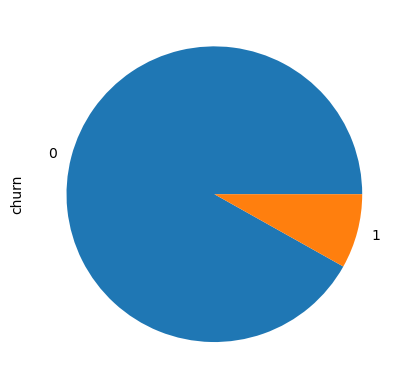

In [44]:
print((tel_data['churn'].value_counts()/len(tel_data))*100)
((tel_data['churn'].value_counts()/len(tel_data))*100).plot(kind="pie")
plt.show()


Observing that 91% of customers do not churn suggests a potential class imbalance in the dataset.

As the variable 'churn' serves as the target variable, all columns related to this variable (those with the suffix _9) can be removed from the dataset.

In [45]:
churn_phase = [col for col in tel_data.columns if '_9' in col]
print("The columns from churn phase are:\n",churn_phase)

The columns from churn phase are:
 ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [46]:
tel_data.drop(churn_phase, axis=1, inplace=True)
tel_data.shape

(30001, 141)

To further refine the dataset, we can eliminate columns related to the good phase that were derived earlier during the creation process.

In [47]:
tel_data.drop(['total_rech_amt_data_6','av_rech_amt_data_6',
               'total_rech_data_6','total_rech_amt_6',
               'total_rech_amt_data_7','av_rech_amt_data_7',
               'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

In [48]:
tel_data.shape

(30001, 133)

Before proceeding with the remaining missing value handling, let's examine the collinearity among the independent variables to understand their interdependencies.

In [49]:
month_6_cols = [col for col in tel_data.columns if '_6' in col]
month_7_cols = [col for col in tel_data.columns if '_7' in col]
month_8_cols = [col for col in tel_data.columns if '_8' in col]

In [50]:
tel_data_corr = tel_data.corr()
tel_data_corr.loc[:,:] = np.tril(tel_data_corr, k=-1)
tel_data_corr = tel_data_corr.stack()
tel_data_corr
tel_data_corr[(tel_data_corr > 0.80) | (tel_data_corr < -0.80)].sort_values(ascending=False)

total_rech_amt_8    arpu_8                0.955351
isd_og_mou_8        isd_og_mou_7          0.943433
                    isd_og_mou_6          0.919641
isd_og_mou_7        isd_og_mou_6          0.916237
sachet_2g_8         total_rech_data_8     0.900629
total_ic_mou_6      loc_ic_mou_6          0.895099
total_ic_mou_8      loc_ic_mou_8          0.893072
total_ic_mou_7      loc_ic_mou_7          0.883070
std_og_t2t_mou_8    onnet_mou_8           0.860483
std_og_t2t_mou_7    onnet_mou_7           0.860275
std_og_t2t_mou_6    onnet_mou_6           0.859593
avg_rech_amt_6_7    overall_rech_amt_7    0.856275
std_og_t2m_mou_7    offnet_mou_7          0.854685
std_og_t2m_mou_8    offnet_mou_8          0.851049
total_og_mou_8      std_og_mou_8          0.848858
total_og_mou_7      std_og_mou_7          0.848825
loc_ic_mou_8        loc_ic_t2m_mou_8      0.847512
std_ic_mou_8        std_ic_t2m_mou_8      0.845590
loc_ic_mou_6        loc_ic_t2m_mou_6      0.844418
loc_og_mou_8        loc_og_mou_

In [51]:
col_to_drop=['total_rech_amt_8','isd_og_mou_8','isd_og_mou_7','sachet_2g_8','total_ic_mou_6',
            'total_ic_mou_8','total_ic_mou_7','std_og_t2t_mou_6','std_og_t2t_mou_8','std_og_t2t_mou_7',
            'std_og_t2m_mou_7','std_og_t2m_mou_8',]

In [52]:
tel_data.drop(col_to_drop, axis=1, inplace=True)
tel_data.shape

(30001, 121)


### Creating new variables to gain insights from the data.

In [53]:
tel_data['tenure'] = (tel_data['aon']/30).round(0)

tel_data.drop('aon',axis=1, inplace=True)

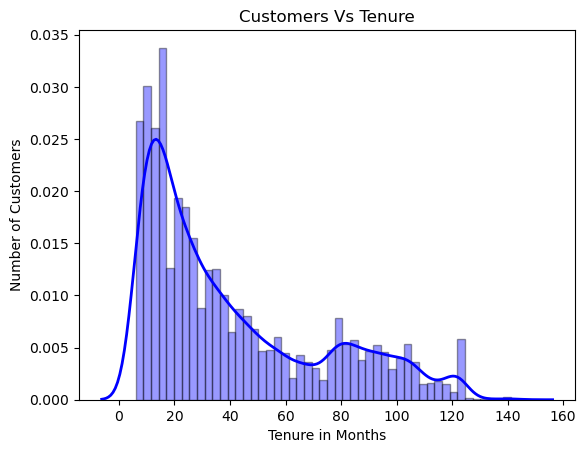

In [54]:
gh=sns.distplot(tel_data['tenure'],bins=50, color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
gh.set_ylabel('Number of Customers')
gh.set_xlabel('Tenure in Months')
gh.set_title('Customers Vs Tenure')
plt.show()

In [55]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
tel_data['tenure_range'] = pd.cut(tel_data['tenure'], tn_range, labels=tn_label)
tel_data['tenure_range'].head()

0     2-5 Yrs    
7     2-5 Yrs    
8     6-12 Months
21    1-2 Yrs    
23    1-2 Yrs    
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

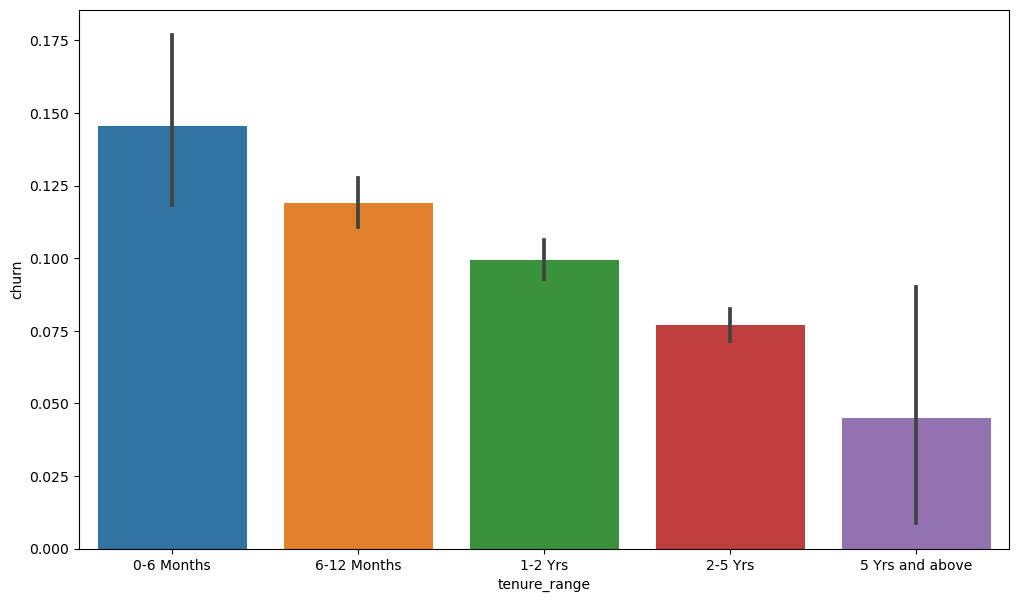

In [56]:
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn', data=tel_data)
plt.show()


The data illustrates that the highest churn rate occurs within the initial 0-6 month period, gradually decreasing as customers continue to stay on the network.


To determine the average revenue per user during the good phase of customer engagement, we can calculate the average of 'arpu_6' and 'arpu_7'. After obtaining this consolidated average, we can drop the individual 'arpu_6' and 'arpu_7' columns for simplification.

In [57]:
tel_data["avg_arpu_6_7"]= (tel_data['arpu_6']+tel_data['arpu_7'])/2
tel_data['avg_arpu_6_7'].head()

0     206.1005 
7     1209.5150
8     435.4720 
21    556.1030 
23    134.1235 
Name: avg_arpu_6_7, dtype: float64

We can enhance the data's interpretability by dropping the original columns, considering they have been derived into new columns.

In [58]:
tel_data.drop(['arpu_6','arpu_7'], axis=1, inplace=True)

tel_data.shape

(30001, 121)

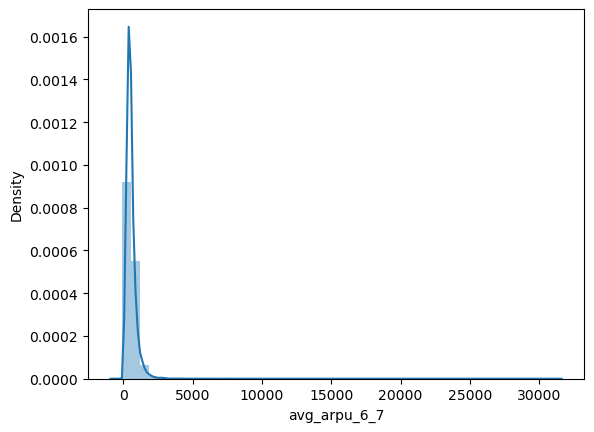

In [59]:
sns.distplot(tel_data['avg_arpu_6_7'])
plt.show()

Examining the correlation between the target variable (SalePrice) and other variables in the dataset.

Text(0.5, 1.0, 'Features Correlating with Churn variable')

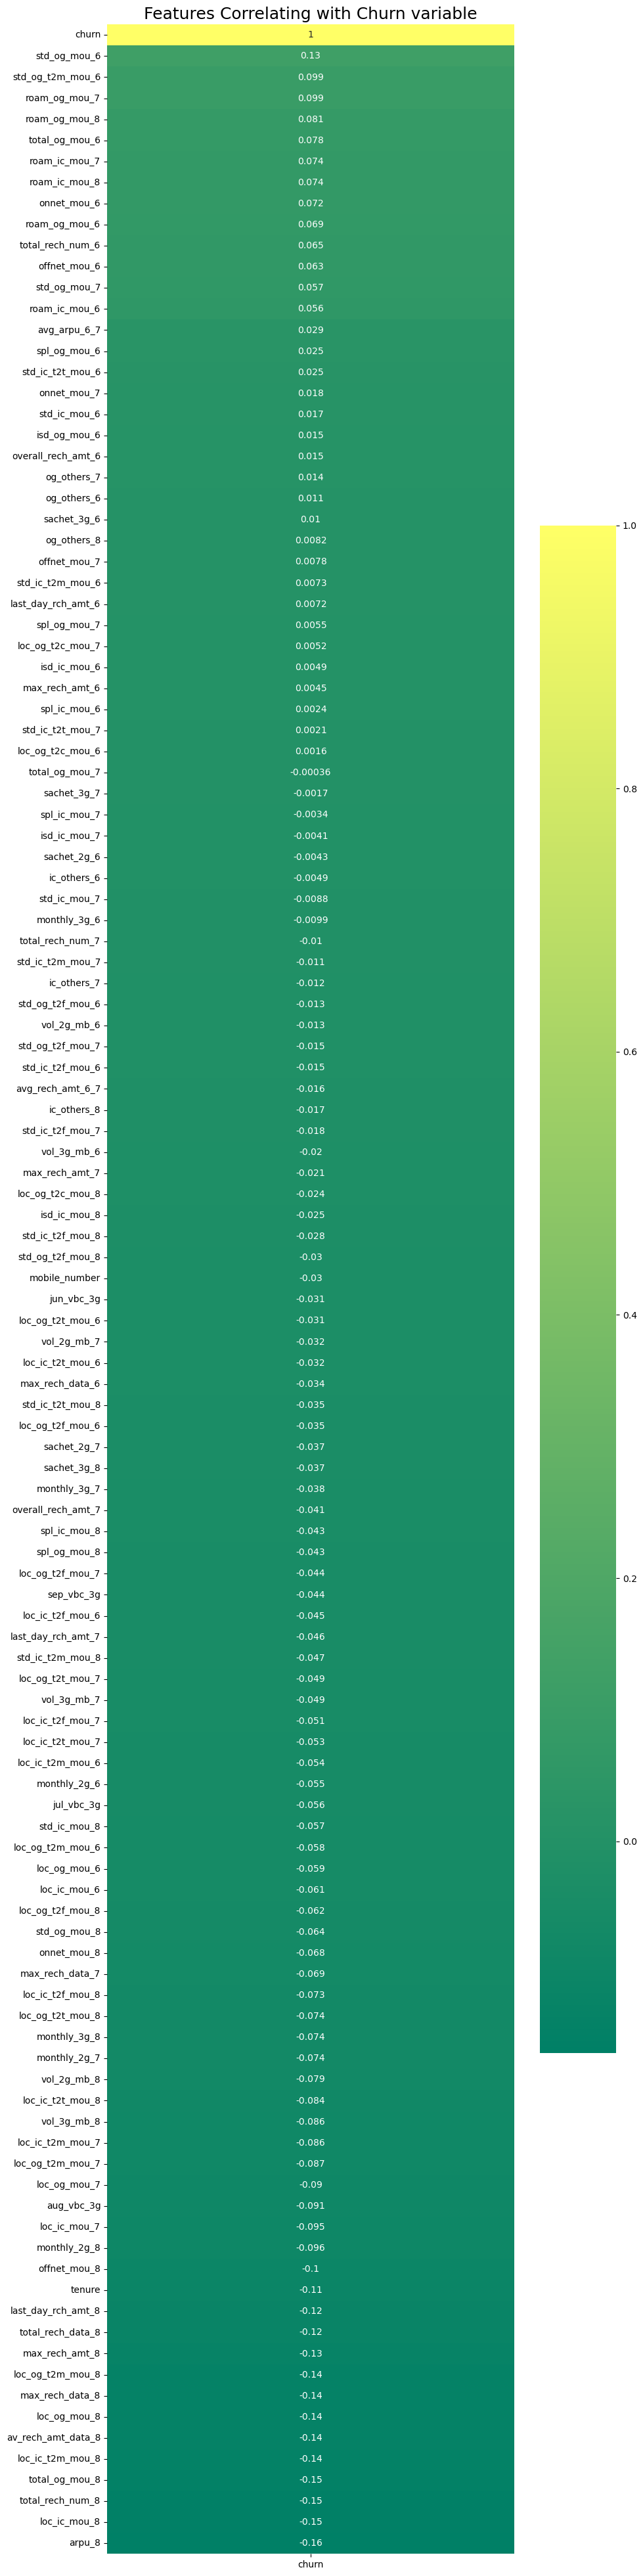

In [60]:
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(tel_data.corr()[['churn']].sort_values(ascending=False, by='churn'),annot=True, 
                                cmap='summer')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=18)

Now, let's create a scatter plot depicting the relationship between total recharge and average revenue for the 8th month.

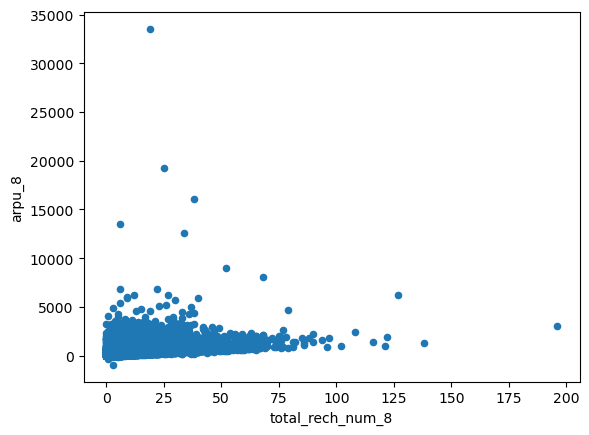

In [61]:
tel_data[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                      y='arpu_8')
plt.show()

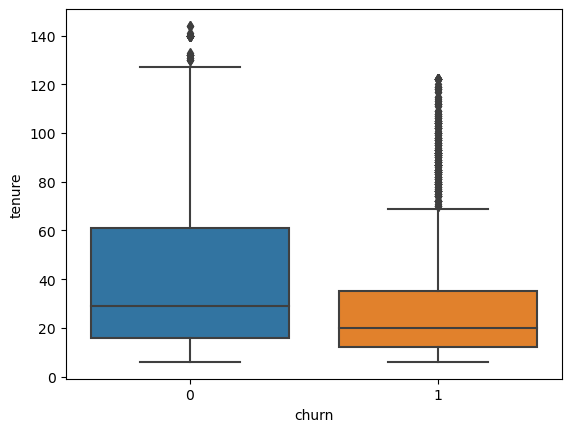

In [62]:
sns.boxplot(x = tel_data.churn, y = tel_data.tenure)

plt.show()

The plot indicates that customers with longer tenures tend not to churn, demonstrating a consistent utilization of telecom services.

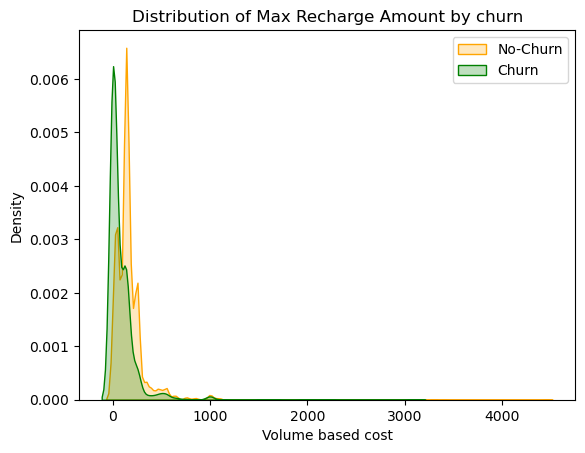

In [63]:
ax = sns.kdeplot(tel_data.max_rech_amt_8[(tel_data["churn"] == 0)],
                color="Orange", shade = True)
ax = sns.kdeplot(tel_data.max_rech_amt_8[(tel_data["churn"] == 1)],
                ax =ax, color="Green", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')
plt.show()

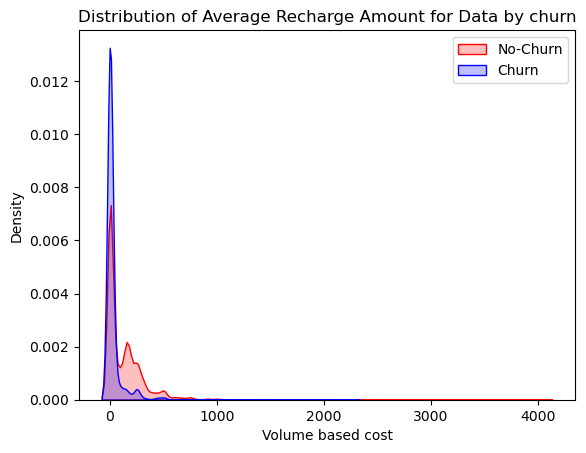

In [64]:
ax = sns.kdeplot(tel_data.av_rech_amt_data_8[(tel_data["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(tel_data.av_rech_amt_data_8[(tel_data["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Average Recharge Amount for Data by churn')
plt.show()

Generating categories for the total recharge column in month 8 and counting their occurrences.

In [65]:
tel_data['total_rech_data_group_8']=pd.cut(tel_data['total_rech_data_8'],[-1,0,10,25,100],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
tel_data['total_rech_num_group_8']=pd.cut(tel_data['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

					Distribution of total_rech_data_8 variable
 <=10_Recharges     15307
No_Recharge        14048
10-25_Recharges    608  
>25_Recharges      38   
Name: total_rech_data_group_8, dtype: int64


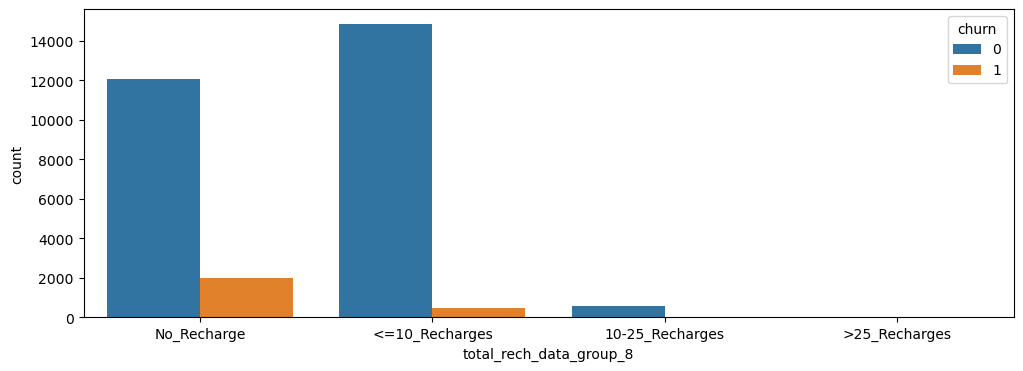

					Distribution of total_rech_num_8 variable
 <=10_Recharges     19349
10-25_Recharges    8073 
>25_Recharges      1996 
No_Recharge        583  
Name: total_rech_num_group_8, dtype: int64


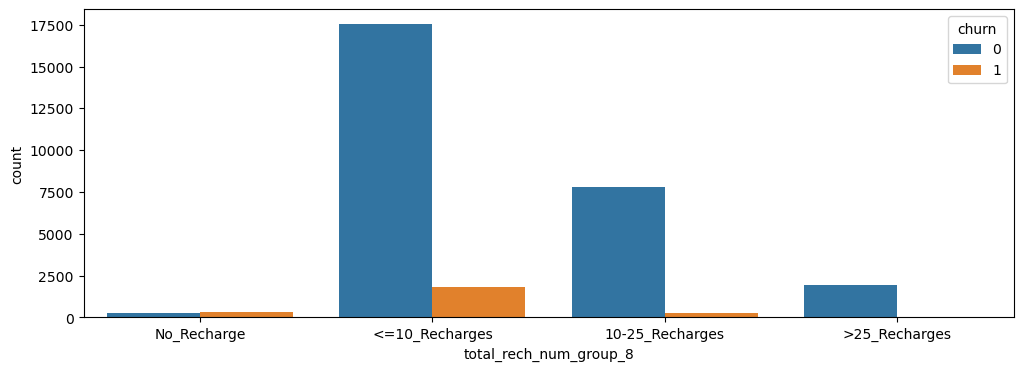

In [66]:
plt.figure(figsize=[12,4])
sns.countplot(data=tel_data,x="total_rech_data_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_data_8 variable\n",tel_data['total_rech_data_group_8'].value_counts())
plt.show()
plt.figure(figsize=[12,4])
sns.countplot(data=tel_data,x="total_rech_num_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_num_8 variable\n",tel_data['total_rech_num_group_8'].value_counts())
plt.show()


There is a clear decrease in churn rate as the number of recharge instances increases.

Generating dummy variables for certain categorical variables and omitting the first one.

In [67]:
dummy = pd.get_dummies(tel_data[['total_rech_data_group_8','total_rech_num_group_8','tenure_range']], drop_first=True)
dummy.head()

,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,1,0,0,1,0,0,0,0,1,0
7,0,0,0,1,0,0,0,0,1,0
8,1,0,0,0,1,0,1,0,0,0
21,0,0,0,0,0,1,0,1,0,0
23,1,0,0,1,0,0,0,1,0,0


In [68]:
# Adding the results to the master dataframe
tel_data = pd.concat([tel_data, dummy], axis=1)
tel_data.head()

,mobile_number,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn,tenure,tenure_range,avg_arpu_6_7,total_rech_data_group_8,total_rech_num_group_8,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,7.000843e+09,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.27,24.613333,0.00,79.27,18.196667,0.00,0.403333,4.813333,0.00,0.353333,0.0,0.00,132.953333,47.636667,0.00,0.41,0.00,0.00,0.00,0.41,0.976667,0.00,0.0,4.14,0.326667,0.00,0.0,0.0,0.0,0.00,0.00,0.00,44.493333,13.396667,0.16,69.183333,62.85,4.13,17.74,22.503333,1.15,131.433333,98.76,5.44,0.00,3.366667,0.00,0.583333,0.37,0.00,1.243333,1.113333,0.00,1.826667,4.853333,0.00,0.043333,0.0,0.0,0.00,0.00,0.00,0.00,0.55,0.00,4.0,3.0,2.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,30.40,0.00,101.20,3.58,614.0,504.0,559.0,1,32.0,2-5 Yrs,206.1005,<=10_Recharges,<=10_Recharges,1,0,0,1,0,0,0,0,1,0
7,7.000702e+09,3171.480,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.380000,40.28,308.63,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.0,0.00,422.160000,533.910000,255.79,49.89,6.66,20.08,16.68,60.86,75.140000,77.84,0.0,4.50,0.000000,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.49,121.19,152.16,101.460000,39.53,427.880000,355.23,188.04,36.89,11.830000,30.39,91.440000,126.99,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,0.210000,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,0.00,1580.0,790.0,1185.0,1,27.0,2-5 Yrs,1209.5150,No_Recharge,<=10_Recharges,0,0,0,1,0,0,0,0,1,0
8,7.001525e+09,137.362,413.69,351.030000,35.08,94.66,80.630000,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.590000,12.49,80.96,70.580000,50.54,0.000000,0.000000,0.00,0.000000,0.0,7.15,378.090000,288.180000,63.04,13.69,0.00,0.00,0.00,130.26,143.480000,98.2

Generating a duplicate of the filtered dataframe.

In [69]:
tel_data2=tel_data[:].copy()

tel_data2.drop(['tenure_range','mobile_number','total_rech_data_group_8','total_rech_num_group_8','sep_vbc_3g','tenure'], axis=1, inplace=True)
tel_data2.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.27,24.613333,0.00,79.27,18.196667,0.00,0.403333,4.813333,0.00,0.353333,0.0,0.00,132.953333,47.636667,0.00,0.41,0.00,0.00,0.00,0.41,0.976667,0.00,0.0,4.14,0.326667,0.00,0.0,0.0,0.0,0.00,0.00,0.00,44.493333,13.396667,0.16,69.183333,62.85,4.13,17.74,22.503333,1.15,131.433333,98.76,5.44,0.00,3.366667,0.00,0.583333,0.37,0.00,1.243333,1.113333,0.00,1.826667,4.853333,0.00,0.043333,0.0,0.0,0.00,0.00,0.00,0.00,0.55,0.00,4.0,3.0,2.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,30.40,0.00,101.20,614.0,504.0,559.0,1,206.1005,1,0,0,1,0,0,0,0,1,0
7,3171.480,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.380000,40.28,308.63,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.0,0.00,422.160000,533.910000,255.79,49.89,6.66,20.08,16.68,60.86,75.140000,77.84,0.0,4.50,0.000000,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.49,121.19,152.16,101.460000,39.53,427.880000,355.23,188.04,36.89,11.830000,30.39,91.440000,126.99,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,0.210000,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,1580.0,790.0,1185.0,1,1209.5150,0,0,0,1,0,0,0,0,1,0
8,137.362,413.69,351.030000,35.08,94.66,80.630000,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.590000,12.49,80.96,70.580000,50.54,0.000000,0.000000,0.00,0.000000,0.0,7.15,378.090000,288.180000,63.04,13.69,0.00,0.00,0.00,130.26,143.480000,98.28,0.0,0.00,0.000000,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.840000,9.840000,0.31,57.580000,13.98,15.48,0.00,0.000000,0.00,81.430000,23.83,15.79,0.00,0.580000,0.10,22.430000,4.08,0.65,0.000000,0.000000,0.00,22.430000,4.6600

Lets create a new dataset "tel1" for  model building

In [70]:
tel1 = tel_data2.drop(['churn'],axis=1)
tel1.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.27,24.613333,0.00,79.27,18.196667,0.00,0.403333,4.813333,0.00,0.353333,0.0,0.00,132.953333,47.636667,0.00,0.41,0.00,0.00,0.00,0.41,0.976667,0.00,0.0,4.14,0.326667,0.00,0.0,0.0,0.0,0.00,0.00,0.00,44.493333,13.396667,0.16,69.183333,62.85,4.13,17.74,22.503333,1.15,131.433333,98.76,5.44,0.00,3.366667,0.00,0.583333,0.37,0.00,1.243333,1.113333,0.00,1.826667,4.853333,0.00,0.043333,0.0,0.0,0.00,0.00,0.00,0.00,0.55,0.00,4.0,3.0,2.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,30.40,0.00,101.20,614.0,504.0,559.0,206.1005,1,0,0,1,0,0,0,0,1,0
7,3171.480,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.380000,40.28,308.63,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.0,0.00,422.160000,533.910000,255.79,49.89,6.66,20.08,16.68,60.86,75.140000,77.84,0.0,4.50,0.000000,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.49,121.19,152.16,101.460000,39.53,427.880000,355.23,188.04,36.89,11.830000,30.39,91.440000,126.99,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,0.210000,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,1580.0,790.0,1185.0,1209.5150,0,0,0,1,0,0,0,0,1,0
8,137.362,413.69,351.030000,35.08,94.66,80.630000,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.590000,12.49,80.96,70.580000,50.54,0.000000,0.000000,0.00,0.000000,0.0,7.15,378.090000,288.180000,63.04,13.69,0.00,0.00,0.00,130.26,143.480000,98.28,0.0,0.00,0.000000,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.840000,9.840000,0.31,57.580000,13.98,15.48,0.00,0.000000,0.00,81.430000,23.83,15.79,0.00,0.580000,0.10,22.430000,4.08,0.65,0.000000,0.000000,0.00,22.430000,4.660000,0.75,0.

Lets create a new dataset "tel2" for model building

In [71]:
tel2=tel_data2['churn']
tel2.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int32

Spliting the dateset into train and test datasets

In [72]:
from sklearn.model_selection import train_test_split

tel1_train, tel1_test, tel2_train, tel2_test = train_test_split(tel1, tel2, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of tel1_train:", tel1_train.shape)
print("Dimension of tel1_test:", tel1_test.shape)

Dimension of tel1_train: (21000, 126)
Dimension of tel1_test: (9001, 126)


In [73]:
tel1_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 15709 to 99093
Data columns (total 126 columns):
 #    Column                                   Dtype  
---   ------                                   -----  
 0    arpu_8                                   float64
 1    onnet_mou_6                              float64
 2    onnet_mou_7                              float64
 3    onnet_mou_8                              float64
 4    offnet_mou_6                             float64
 5    offnet_mou_7                             float64
 6    offnet_mou_8                             float64
 7    roam_ic_mou_6                            float64
 8    roam_ic_mou_7                            float64
 9    roam_ic_mou_8                            float64
 10   roam_og_mou_6                            float64
 11   roam_og_mou_7                            float64
 12   roam_og_mou_8                            float64
 13   loc_og_t2t_mou_6                         float64
 14   

In [74]:
num_col = tel1_train.select_dtypes(include = ['int64','float64']).columns.tolist()

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
tel1_train[num_col] = scaler.fit_transform(tel1_train[num_col])

tel1_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
15709,0.038904,0.000235,0.000531,0.000238,0.004211,0.003651,0.004095,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000269,0.000585,0.000238,0.007005,0.006330,0.015246,0.003075,0.000000,0.000980,0.000000,0.010426,0.006708,0.003471,0.004240,0.005214,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.006292,0.002472,0.000000,0.0,0.0,0.003461,0.003487,0.004268,0.004415,0.005650,0.012348,0.014898,0.012389,0.018297,0.001078,0.003333,0.000000,0.013386,0.014004,0.024154,0.000000,0.000000,0.000000,0.001320,0.000000,0.000000,0.0,0.00000,0.0,0.001119,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.009772,0.050725,0.015306,0.038404,0.038404,0.034615,0.038404,0.038404,0.034615,0.017544,0.099035,0.099035,0.099035,0.037922,0.003367,0.026477,0.021871,0.000000,0.000000,0.000000,0.25,0.25,0.2,0.000000,0.041667,0.0,0.000000,0.0000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.003420,0.015354,0.002411,0.063393,1,0,0,1,0,0,0,0,0,0
28202,0.032921,0.000493,0.000000,0.000000,0.001631,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000566,0.000000,0.000000,0.002533,0.000000,0.000000,0.002454,0.000000,0.000000,0.000000,0.000000,0.000000,0.001624,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.001620,0.000000,0.000000,0.013088,0.007020,0.003657,0.041620,0.021697,0.014587,0.013215,0.008694,0.000000,0.040335,0.022862,0.014662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00209,0.0,0.000000,0.000316,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.055375,0.108696,0.040816,0.009227,0.009227,0.008316,0.009227,0.005985,0.005619,0.105263,0.016077,0.016077,0.016077,0.034967,0.064367,0.045634,0.035909,0.000332,0.000000,0.000000,0.00,0.00,0.0,0.166667,0.083333,0.0,0.000000,0.0000,0.0,0.057143,0.0,0.000000,0.000000,0.0,0.009431,0.020687,0.010484,0.068877,1,0,0,1,0,0,0,0,1,0
14943,0.033826,0.000876,0.000275,0.00071

### Data Imbalance Handling

##### Using SMOTE method, we can balance the data w.r.t. churn variable and proceed further

In [75]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
tel1_train_sm,tel2_train_sm = sm.fit_resample(tel1_train,tel2_train)
print("Dimension of tel1_train_sm Shape:", tel1_train_sm.shape)
print("Dimension of tel2_train_sm Shape:", tel2_train_sm.shape)

Dimension of tel1_train_sm Shape: (38576, 126)
Dimension of tel2_train_sm Shape: (38576,)


#### Logistic Regression

In [76]:
import statsmodels.api as sm
logm1 = sm.GLM(tel2_train_sm,(sm.add_constant(tel1_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38450
Model Family:                Binomial   Df Model:                          125
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13899.
Date:                Sat, 10 Feb 2024   Deviance:                       27799.
Time:                        20:23:39   Pearson chi2:                 2.47e+14
No. Iterations:                   100   Pseudo R-squ. (CS):             0.4861
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       1.0696      0.152      7.048      0.000       0.772       1.367
arpu_8                                      4.7856      1.723      2.777      0.005       1.408       8.163
onnet_mou_6                               -51.0285     28.723     -1.777      0.076    -107.324       5.267
onnet_mou_7                                58.2210     16.329      3.566      0.000      26.217      90.225
onnet_mou_8                               181.4643     24.154      7.513      0.000     134.123     228.806
offnet_mou_6                              -47.8874     32.383     -1.479      0.139    -111.358      15.583
offnet_mou_7                               71.5233     19.307      3.705      0.000      33.682     109.364
offnet_mou_8                              232.4309     31.429      7.395      0.000     170.830     294.031
roam_ic_mou_6                               3.0054      0.846      3.554      0.000       1.348       4.663
roam_ic_mou_7                               5.1800      1.572      3.295      0.001       2.099       8.261
roam_ic_mou_8                              -1.5652      0.802     -1.953      0.051      -3.136       0.006
roam_og_mou_6                              21.8398     14.675      1.488      0.137      -6.924      50.603
roam_og_mou_7                             -12.2597      3.827     -3.204      0.001     -19.760      -4.759
roam_og_mou_8                             -55.8880      7.814     -7.152      0.000     -71.203     -40.573
loc_og_t2t_mou_6                        -6948.9982   1.98e+04     -0.352      0.725   -4.57e+04    3.18e+04
loc_og_t2t_mou_7                        -1.823e+04   2.28e+04     -0.800      0.424   -6.29e+04    2.64e+04
loc_og_t2t_mou_8                          1.93e+05   3.41e+04      5.662      0.000    1.26e+05     2.6e+05
loc_og_t2m_mou_6                        -5118.4825   1.45e+04     -0.352      0.725   -3.36e+04    2.34e+04
loc_og_t2m_mou_7                        -1.099e+04   1.37e+04     -0.800      0.424   -3.79e+04    1.59e+04
loc_og_t2m_mou_8                         6.367e+04   1.12e+04      5.662      0.000    4.16e+04    8.57e+04
loc_og_t2f_mou_6                         -729.5970   2078.318     -0.351      0.726   -4803.025    3343.831
loc_og_t2f_mou_7                        -2621.4649   3259.201     -0.804      0.421   -9009.381    3766.451
loc_og_t2f_mou_8                         1.667e+04   2943.446      5.664      0.000    1.09e+04    2.24e+04
loc_og_t2c_mou_6                           -5.0019      1.067     -4.686      0.000      -7.094      -2.910
loc_og_t2c_mou_7                            0.2131      1.863      0.114      0.909      -3.438       3.864
loc_og_t2c_mou_8                            0.3722      1.2

#### Logistic Regression using Feature Selection (RFE method)

In [77]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

rfe = RFE(estimator=LogisticRegression(), n_features_to_select=20)           
rfe = rfe.fit(tel1_train_sm, tel2_train_sm)

In [78]:
rfe.support_

array([ True, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False,  True, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True,  True, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False])

In [79]:
rfe_columns=tel1_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['arpu_8', 'roam_ic_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8',
       'std_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_8', 'std_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'total_rech_data_8', 'av_rech_amt_data_8', 'vol_2g_mb_8',
       'monthly_2g_8', 'aug_vbc_3g', 'avg_arpu_6_7'],
      dtype='object')


In [80]:
list(zip(tel1_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_6', False, 22),
 ('onnet_mou_7', False, 37),
 ('onnet_mou_8', False, 42),
 ('offnet_mou_6', False, 35),
 ('offnet_mou_7', False, 21),
 ('offnet_mou_8', False, 26),
 ('roam_ic_mou_6', False, 13),
 ('roam_ic_mou_7', True, 1),
 ('roam_ic_mou_8', False, 60),
 ('roam_og_mou_6', False, 69),
 ('roam_og_mou_7', False, 33),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 65),
 ('loc_og_t2t_mou_7', False, 99),
 ('loc_og_t2t_mou_8', False, 19),
 ('loc_og_t2m_mou_6', False, 67),
 ('loc_og_t2m_mou_7', False, 74),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 107),
 ('loc_og_t2f_mou_7', False, 5),
 ('loc_og_t2f_mou_8', False, 25),
 ('loc_og_t2c_mou_6', False, 7),
 ('loc_og_t2c_mou_7', False, 66),
 ('loc_og_t2c_mou_8', False, 104),
 ('loc_og_mou_6', False, 48),
 ('loc_og_mou_7', False, 105),
 ('loc_og_mou_8', False, 2),
 ('std_og_t2m_mou_6', False, 93),
 ('std_og_t2f_mou_6', False, 79),
 ('std_og_t2f_mou_7', False, 27),
 ('std_og_t2f_mou_8',

### Assessing the model with StatsModels

In [81]:
tel1_train_SM = sm.add_constant(tel1_train_sm[rfe_columns])
logm2 = sm.GLM(tel2_train_sm,tel1_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38555
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15852.
Date:                Sat, 10 Feb 2024   Deviance:                       31703.
Time:                        20:24:47   Pearson chi2:                 8.44e+10
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4313
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5718      0.071      8.101      0.000       0.433       0.710
arpu_8                -7.4189      1.295     -5.730      0.000      -9.957      -4.881
roam_ic_mou_7          8.3147      0.929      8.948      0.000       6.493      10.136
roam_og_mou_8          4.3254      0.602      7.190      0.000       3.146       5.505
loc_og_t2m_mou_8      -3.8292      0.668     -5.731      0.000      -5.139      -2.520
std_og_mou_7           7.7463      0.513     15.114      0.000       6.742       8.751
total_og_mou_8       -20.2090      0.956    -21.143      0.000     -22.082     -18.336
loc_ic_t2t_mou_8       1.0280      4.078      0.252      0.801      -6.966       9.022
loc_ic_t2m_mou_8      -1.2611      4.448     -0.284      0.777      -9.978       7.456
loc_ic_mou_6           9.1611      0.723     12.666      0.000       7.743      10.579
loc_ic_mou_8         -31.0473      5.010     -6.197      0.000     -40.866     -21.228
std_ic_mou_8         -11.9357      1.359     -8.784      0.000     -14.599      -9.272
spl_ic_mou_8         -19.8516      1.375    -14.436      0.000     -22.547     -17.156
total_rech_num_8      -7.0996      0.533    -13.327      0.000      -8.144      -6.055
last_day_rch_amt_8   -18.3227      0.810    -22.610      0.000     -19.911     -16.734
total_rech_data_8     -8.9207      0.612    -14.580      0.000     -10.120      -7.721
av_rech_amt_data_8    -5.2450      0.644     -8.148      0.000      -6.507      -3.983
vol_2g_mb_8          -10.4892      0.934    -11.229      0.000     -12.320      -8.658
monthly_2g_8          -5.7717      0.360    -16.041      0.000      -6.477      -5.066
aug_vbc_3g            -6.8396      0.588    -11.633      0.000      -7.992      -5.687
avg_arpu_6_7          18.2676      1.089     16.781      0.000      16.134      20.401
======================================================================================
"""

Based on the p-values of individual columns, we should drop the column 'loc_ic_t2t_mou_8' due to its high p-value of 0.80.

In [82]:
rfe_columns_1=rfe_columns.drop('loc_ic_t2t_mou_8',1)
print("\nThe newly edited set of features includes:\n",rfe_columns_1)


The newly edited set of features includes:
 Index(['arpu_8', 'roam_ic_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8',
       'std_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6',
       'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'monthly_2g_8', 'aug_vbc_3g', 'avg_arpu_6_7'],
      dtype='object')


Training the model using the updated list of features.

In [83]:
tel1_train_SM = sm.add_constant(tel1_train_sm[rfe_columns_1])
logm2 = sm.GLM(tel2_train_sm,tel1_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38556
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15852.
Date:                Sat, 10 Feb 2024   Deviance:                       31703.
Time:                        20:24:47   Pearson chi2:                 8.49e+10
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4313
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5714      0.071      8.096      0.000       0.433       0.710
arpu_8                -7.4196      1.295     -5.730      0.000      -9.957      -4.882
roam_ic_mou_7          8.3174      0.929      8.950      0.000       6.496      10.139
roam_og_mou_8          4.3268      0.602      7.192      0.000       3.148       5.506
loc_og_t2m_mou_8      -3.8309      0.668     -5.734      0.000      -5.140      -2.521
std_og_mou_7           7.7428      0.512     15.114      0.000       6.739       8.747
total_og_mou_8       -20.2018      0.955    -21.146      0.000     -22.074     -18.329
loc_ic_t2m_mou_8      -2.2429      2.136     -1.050      0.294      -6.429       1.943
loc_ic_mou_6           9.1640      0.723     12.669      0.000       7.746      10.582
loc_ic_mou_8         -29.8843      1.933    -15.463      0.000     -33.672     -26.096
std_ic_mou_8         -11.9422      1.359     -8.789      0.000     -14.605      -9.279
spl_ic_mou_8         -19.8488      1.375    -14.435      0.000     -22.544     -17.154
total_rech_num_8      -7.0935      0.532    -13.330      0.000      -8.136      -6.051
last_day_rch_amt_8   -18.3273      0.810    -22.622      0.000     -19.915     -16.739
total_rech_data_8     -8.9222      0.612    -14.583      0.000     -10.121      -7.723
av_rech_amt_data_8    -5.2484      0.644     -8.155      0.000      -6.510      -3.987
vol_2g_mb_8          -10.4886      0.934    -11.228      0.000     -12.320      -8.658
monthly_2g_8          -5.7723      0.360    -16.043      0.000      -6.478      -5.067
aug_vbc_3g            -6.8433      0.588    -11.642      0.000      -7.995      -5.691
avg_arpu_6_7          18.2734      1.088     16.790      0.000      16.140      20.406
======================================================================================
"""

Based on the p-values of individual columns, we should drop the column 'loc_ic_t2t_mou_8' due to its high p-value of 0.80.

In [84]:
rfe_columns_2=rfe_columns_1.drop('loc_ic_t2m_mou_8',1)
print("\nThe newly edited set of features includes:\n",rfe_columns_2)


The newly edited set of features includes:
 Index(['arpu_8', 'roam_ic_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8',
       'std_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_8',
       'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'monthly_2g_8', 'aug_vbc_3g', 'avg_arpu_6_7'],
      dtype='object')


#### Training the model using the updated list of features.

In [85]:
tel1_train_SM = sm.add_constant(tel1_train_sm[rfe_columns_2])
logm2 = sm.GLM(tel2_train_sm,tel1_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38557
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15852.
Date:                Sat, 10 Feb 2024   Deviance:                       31704.
Time:                        20:24:47   Pearson chi2:                 8.51e+10
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4313
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5682      0.071      8.055      0.000       0.430       0.706
arpu_8                -7.3871      1.294     -5.709      0.000      -9.923      -4.851
roam_ic_mou_7          8.2919      0.930      8.919      0.000       6.470      10.114
roam_og_mou_8          4.3369      0.602      7.208      0.000       3.158       5.516
loc_og_t2m_mou_8      -3.9987      0.650     -6.156      0.000      -5.272      -2.725
std_og_mou_7           7.7052      0.511     15.082      0.000       6.704       8.707
total_og_mou_8       -20.1259      0.952    -21.139      0.000     -21.992     -18.260
loc_ic_mou_6           9.1605      0.724     12.652      0.000       7.741      10.580
loc_ic_mou_8         -31.5914      1.068    -29.592      0.000     -33.684     -29.499
std_ic_mou_8         -11.9423      1.359     -8.790      0.000     -14.605      -9.280
spl_ic_mou_8         -19.8518      1.375    -14.440      0.000     -22.546     -17.157
total_rech_num_8      -7.1243      0.531    -13.408      0.000      -8.166      -6.083
last_day_rch_amt_8   -18.3312      0.810    -22.622      0.000     -19.919     -16.743
total_rech_data_8     -8.9197      0.612    -14.580      0.000     -10.119      -7.721
av_rech_amt_data_8    -5.2486      0.644     -8.155      0.000      -6.510      -3.987
vol_2g_mb_8          -10.5014      0.934    -11.242      0.000     -12.332      -8.671
monthly_2g_8          -5.7637      0.360    -16.025      0.000      -6.469      -5.059
aug_vbc_3g            -6.8479      0.588    -11.651      0.000      -8.000      -5.696
avg_arpu_6_7          18.3112      1.088     16.823      0.000      16.178      20.445
======================================================================================
"""

Obtaining the predicted values for the training set.

In [86]:
tel2_train_sm_pred = res.predict(tel1_train_SM)
tel2_train_sm_pred = tel2_train_sm_pred.values.reshape(-1)
tel2_train_sm_pred[:10]

array([1.38574250e-01, 4.01121753e-01, 3.24275768e-01, 4.14619020e-01,
       5.08729618e-01, 4.31066021e-01, 2.12010834e-05, 2.27844968e-01,
       5.14992869e-02, 7.08374581e-01])

### Generating a DataFrame containing the actual churn flag and the predicted probabilities.

In [87]:
tel2_train_sm_pred_final = pd.DataFrame({'Converted':tel2_train_sm.values, 'Converted_prob':tel2_train_sm_pred})
tel2_train_sm_pred_final.head()

,Converted,Converted_prob
0,0,0.138574
1,0,0.401122
2,0,0.324276
3,0,0.414619
4,0,0.508730


### Creating a new column named 'churn_pred', assigning a value of 1 if Churn_Prob > 0.5, otherwise assigning 0.

In [88]:
tel2_train_sm_pred_final['churn_pred'] = tel2_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

tel2_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,0,0.138574,0
1,0,0.401122,0
2,0,0.324276,0
3,0,0.414619,0
4,0,0.508730,1


In [89]:
from sklearn import metrics

confusion = metrics.confusion_matrix(tel2_train_sm_pred_final.Converted, tel2_train_sm_pred_final.churn_pred )
print(confusion)

[[15661  3627]
 [ 2775 16513]]


Predicted__________not_churn__________churn

Actual

not_churn__________15661____________3627

churn______________2775____________16513 

Checking accuracy of the model

In [90]:
print("The overall accuracy of the model is:",metrics.accuracy_score(tel2_train_sm_pred_final.Converted, tel2_train_sm_pred_final.churn_pred))

The overall accuracy of the model is: 0.8340418913313977


#### Checking for the VIF (Variance Inflation Factor) values of the feature variables.

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = tel1_train_sm[rfe_columns_2].columns
vif['VIF'] = [variance_inflation_factor(tel1_train_sm[rfe_columns].values, i) for i in range(tel1_train_sm[rfe_columns_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,spl_ic_mou_8,83.90
7,loc_ic_mou_8,42.86
0,arpu_8,18.96
6,loc_ic_mou_6,18.68
5,total_og_mou_8,5.46
12,total_rech_data_8,3.58
4,std_og_mou_7,3.27
8,std_ic_mou_8,2.88
15,monthly_2g_8,2.76
3,loc_og_t2m_mou_8,2.54


### Metrics beyond simply accuracy

In [92]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

Let's examine the sensitivity of our logistic regression model.

In [93]:
print("Sensitivity = ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.8561281625881377
Specificity =  0.8119556200746578
False Positive Rate =  0.18804437992534218
Precision =  0.8199106256206554
True Negative Prediction Rate =  0.8494792796702104


#### Plotting the ROC Curve

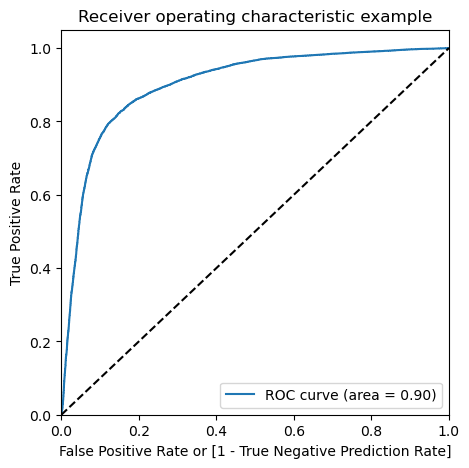

In [94]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


pr, tpr, thresholds = metrics.roc_curve( tel2_train_sm_pred_final.Converted, tel2_train_sm_pred_final.Converted_prob, drop_intermediate = False )


draw_roc(tel2_train_sm_pred_final.Converted, tel2_train_sm_pred_final.Converted_prob)

### Finding Optimal Cutoff Point

In [95]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    tel2_train_sm_pred_final[i]= tel2_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
tel2_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.138574,0,1,1,0,0,0,0,0,0,0,0
1,0,0.401122,0,1,1,1,1,1,0,0,0,0,0
2,0,0.324276,0,1,1,1,1,0,0,0,0,0,0
3,0,0.414619,0,1,1,1,1,1,0,0,0,0,0
4,0,0.508730,1,1,1,1,1,1,1,0,0,0,0


Calculating the sensitivity

In [96]:
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(tel2_train_sm_pred_final.Converted, tel2_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0  0.0          0.500000  1.000000     0.000000   
0.1  0.1          0.686696  0.977603     0.395790   
0.2  0.2          0.751996  0.957538     0.546454   
0.3  0.3          0.791321  0.925653     0.656989   
0.4  0.4          0.816881  0.891176     0.742586   
0.5  0.5          0.834042  0.856128     0.811956   
0.6  0.6          0.836116  0.805682     0.866549   
0.7  0.7          0.820795  0.730350     0.911240   
0.8  0.8          0.755003  0.561230     0.948776   
0.9  0.9          0.614294  0.248185     0.980402   


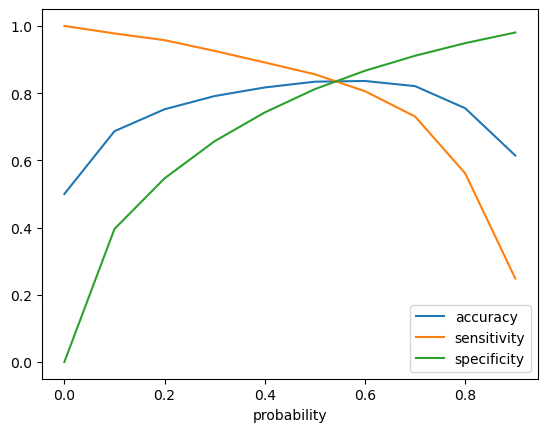

In [97]:
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()


Initially, we chose the optimal classification threshold as 0.5. However, from the graph above, we observe that the optimal cutoff point is slightly higher than 0.5 but lower than 0.6. Let's fine-tune the threshold further within this range.

In [98]:
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    tel2_train_sm_pred_final[i]= tel2_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
tel2_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.138574,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.401122,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.324276,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.414619,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.508730,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [99]:
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(tel2_train_sm_pred_final.Converted, tel2_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50  0.50         0.834042  0.856128     0.811956   
0.51  0.51         0.835001  0.851669     0.818333   
0.52  0.52         0.835675  0.846796     0.824554   
0.53  0.53         0.836038  0.841611     0.830465   
0.54  0.54         0.836245  0.836375     0.836116   
0.55  0.55         0.836064  0.830983     0.841145   
0.56  0.56         0.837075  0.826991     0.847159   
0.57  0.57         0.837179  0.821910     0.852447   
0.58  0.58         0.836219  0.815896     0.856543   
0.59  0.59         0.835831  0.810452     0.861209   


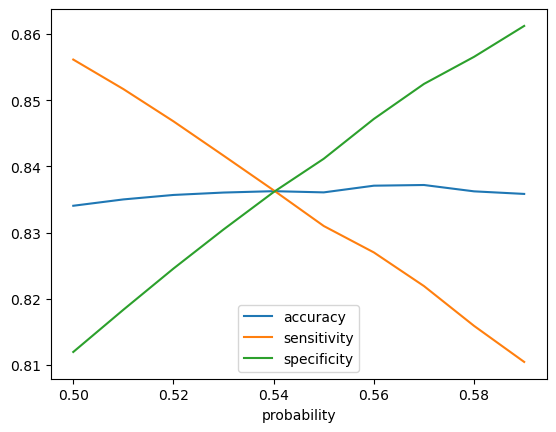

In [100]:
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

Based on the graph above, we can conclude that the optimal cutoff point in the probability to define the predicted churn variable converges at 0.54.

Based on the curve above, the optimal cutoff probability point to consider is 0.2.

In [101]:
tel2_train_sm_pred_final['final_churn_pred'] = tel2_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.54 else 0)

tel2_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.138574,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.401122,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.324276,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.414619,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.508730,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Checking the overall accuracy of the model

In [102]:
print("The overall accuracy of the model now is:",metrics.accuracy_score(tel2_train_sm_pred_final.Converted, tel2_train_sm_pred_final.final_churn_pred))

The overall accuracy of the model now is: 0.8362453338863542


In [103]:
confusion2 = metrics.confusion_matrix(tel2_train_sm_pred_final.Converted, tel2_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[16127  3161]
 [ 3156 16132]]


Predicted__________not_churn__________churn

not_churn__________16127____________3161

churn______________3156____________16132

In [104]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.8363749481542928
Specificity =  0.8361157196184156
False Positive Rate =  0.1638842803815844
Precision =  0.8361581920903954
True Negative Prediction Rate =  0.8363325208733081


### Precision and recall tradeoff

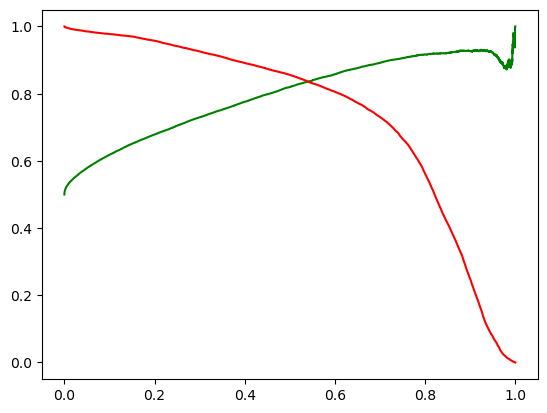

In [105]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(tel2_train_sm_pred_final.Converted, tel2_train_sm_pred_final.Converted_prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Making predictions on the test set

#### Performing data transformation and feature selection for the test dataset.

In [106]:
tel1_test[num_col] = scaler.transform(tel1_test[num_col])
tel1_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
35865,0.026143,0.021027,0.000000,0.000070,0.003412,0.000575,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000249,0.000000,0.000000,0.003565,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.001734,0.000000,0.000000,0.001402,0.000000,0.000000,0.0,0.019587,0.000000,0.000054,0.0,0.000000,0.004941,0.000000,0.000000,0.0,0.0,0.017204,0.000489,0.000053,0.001493,0.001937,0.000162,0.003225,0.002280,0.002466,0.000077,0.000000,0.002178,0.003321,0.003182,0.002782,0.000000,0.000041,0.000023,0.001853,0.000000,0.010098,0.0,0.0,0.0,0.001572,0.000036,0.009587,0.0,0.018753,0.000000,0.000053,0.000000,0.000000,0.0,0.000000,0.0,0.016287,0.050725,0.010204,0.022444,0.006234,0.002248,0.004239,0.002494,0.000000,0.000000,0.010932,0.016077,0.000000,0.000000,0.008393,0.041051,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.02381,0.104167,0.000000,0.000000,0.0000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.002203,0.012662,0.000033,0.059622,0,0,0,1,0,0,1,0,0,0
41952,0.048190,0.005702,0.005250,0.002058,0.011146,0.023873,0.007510,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.006489,0.004028,0.002058,0.000516,0.003132,0.005379,0.000000,0.001285,0.000409,0.000000,0.036826,0.0,0.004151,0.005882,0.003767,0.010557,0.004741,0.018985,0.0,0.010802,0.018971,0.006132,0.0,0.000000,0.020936,0.000000,0.000000,0.0,0.0,0.012674,0.024301,0.009067,0.025150,0.049448,0.023064,0.002868,0.011624,0.005979,0.000000,0.000000,0.000000,0.023235,0.051159,0.022029,0.003628,0.011922,0.005535,0.018785,0.038543,0.004938,0.0,0.0,0.0,0.019560,0.030083,0.008684,0.0,0.000000,0.000000,0.000000,0.006005,0.000000,0.0,0.012541,0.0,0.009772,0.043478,0.020408,0.049875,0.037406,0.032592,0.049875,0.021446,0.011238,0.017544,0.097749,0.093248,0.093248,0.035705,0.002835,0.002872,0.004586,0.001774,0.029730,0.009727,0.00,0.0,0.0,0.02381,0.000000,0.000000,0.071429,0.0625,0.034483,0.0,0.0,0.019572,0.057999,0.000000,0.008444,0.009309,0.004312,0.075152,1,0,0,1,0,0,0,0,1,0
98938,0.061230,0.003

In [107]:
tel1_test=tel1_test[rfe_columns_2]
tel1_test.head()

,arpu_8,roam_ic_mou_7,roam_og_mou_8,loc_og_t2m_mou_8,std_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_8,std_ic_mou_8,spl_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,monthly_2g_8,aug_vbc_3g,avg_arpu_6_7
35865,0.026143,0.000000,0.000000,0.000000,0.000000,0.000053,0.003321,0.002782,0.009587,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.059622
41952,0.048190,0.000000,0.000000,0.005379,0.018971,0.009067,0.023235,0.022029,0.008684,0.000000,0.020408,0.011238,0.017544,0.035705,0.004586,0.0,0.019572,0.075152
98938,0.061230,0.000000,0.000000,0.073716,0.000374,0.024987,0.057580,0.183375,0.003706,0.000000,0.035714,0.029220,0.035088,0.124107,0.056568,0.0,0.211621,0.095894
29459,0.042998,0.000000,0.000000,0.000000,0.000000,0.000800,0.001622,0.000037,0.011386,0.000000,0.025510,0.034615,0.052632,0.063039,0.008221,0.2,0.068735,0.070960
70682,0.098384,0.000721,0.031491,0.041749,0.172443,0.157573,0.021147,0.066205,0.002352,0.080257,0.061224,0.029220,0.017544,0.005664,0.000000,0.0,0.000000,0.101081


In [108]:
tel1_test_SM = sm.add_constant(tel1_test)

### Predicting the target variable

In [109]:
tel2_test_pred = res.predict(tel1_test_SM)
print("\n The first ten probability value of the prediction are:\n",tel2_test_pred[:10])


 The first ten probability value of the prediction are:
 35865    0.772260
41952    0.516558
98938    0.000325
29459    0.128443
70682    0.007754
58317    0.237200
4860     0.007990
16890    0.702931
61329    0.652452
94332    0.491091
dtype: float64


In [110]:
tel2_pred = pd.DataFrame(tel2_test_pred)
tel2_pred.head()

,0
35865,0.772260
41952,0.516558
98938,0.000325
29459,0.128443
70682,0.007754


In [111]:
tel2_pred=tel2_pred.rename(columns = {0:"Conv_prob"})
tel2_test_df = pd.DataFrame(tel2_test)
tel2_test_df.head()

,churn
35865,0
41952,0
98938,0
29459,0
70682,0


In [112]:
tel2_pred_final = pd.concat([tel2_test_df,tel2_pred],axis=1)
tel2_pred_final.head()

,churn,Conv_prob
35865,0,0.772260
41952,0,0.516558
98938,0,0.000325
29459,0,0.128443
70682,0,0.007754


In [113]:
tel2_pred_final['test_churn_pred'] = tel2_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
tel2_pred_final.head()

,churn,Conv_prob,test_churn_pred
35865,0,0.772260,1
41952,0,0.516558,0
98938,0,0.000325,0
29459,0,0.128443,0
70682,0,0.007754,0


Cheacking the Accuracy

In [114]:
metrics.accuracy_score(tel2_pred_final.churn, tel2_pred_final.test_churn_pred)

0.8270192200866571

### Metrics Evaluation

In [115]:
confusion2_test = metrics.confusion_matrix(tel2_pred_final.churn, tel2_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[6860 1412]
 [ 145  584]]


In [116]:
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.8010973936899863
Specificity =  0.8293036750483559
False Positive Rate =  0.1706963249516441
Precision =  0.2925851703406814
True Negative Prediction Rate =  0.979300499643112


### The results

In [117]:
print("The accuracy of the predicted model is: ",round(metrics.accuracy_score(tel2_pred_final.churn, tel2_pred_final.test_churn_pred),2)*100,"%")
print("The sensitivity of the predicted model is: ",round(TP3 / float(TP3+FN3),2)*100,"%")

print("\nSince the model is designed as a sensitivity model, it prioritizes the True Positive Rate, emphasizing accurate predictions of churn by customers.\n")

The accuracy of the predicted model is:  83.0 %
The sensitivity of the predicted model is:  80.0 %

Since the model is designed as a sensitivity model, it prioritizes the True Positive Rate, emphasizing accurate predictions of churn by customers.



#### ROC curve for the test dataset

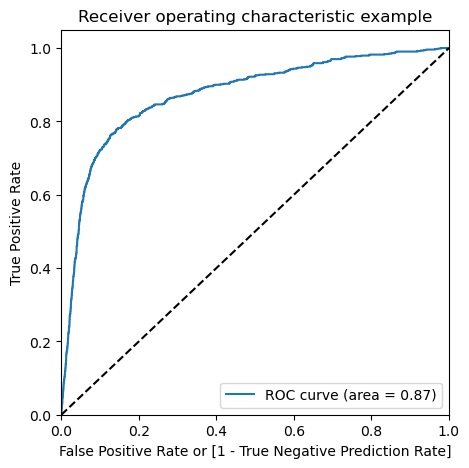

In [118]:
fpr, tpr, thresholds = metrics.roc_curve(tel2_pred_final.churn,tel2_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(tel2_pred_final.churn,tel2_pred_final.Conv_prob)


With an AUC score of 0.90 for the train dataset and 0.87 for the test dataset, this model can be deemed as effective, indicating its capability in distinguishing between positive and negative classes.

### Logistic Regression using PCA

In [119]:
tel1_train, tel1_test, tel2_train, tel2_test = train_test_split(tel1, tel2, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of tel1_train:", tel1_train.shape)
print("Dimension of tel1_test:", tel1_test.shape)

# apply scaling on the dataset

scaler = MinMaxScaler()
tel1_train[num_col] = scaler.fit_transform(tel1_train[num_col])
tel1_test[num_col] = scaler.transform(tel1_test[num_col])

# Applying SMOTE technique for data imbalance correction

sm = SMOTE(random_state=42)
tel1_train_sm,tel2_train_sm = sm.fit_resample(tel1_train,tel2_train)
print("Dimension of tel1_train_sm Shape:", tel1_train_sm.shape)
print("Dimension of tel2_train_sm Shape:", tel2_train_sm.shape)

tel1_train_sm.head()

Dimension of tel1_train: (21000, 126)
Dimension of tel1_test: (9001, 126)
Dimension of tel1_train_sm Shape: (38576, 126)
Dimension of tel2_train_sm Shape: (38576,)


,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,0.038904,0.000235,0.000531,0.000238,0.004211,0.003651,0.004095,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000269,0.000585,0.000238,0.007005,0.006330,0.015246,0.003075,0.000000,0.000980,0.000000,0.010426,0.006708,0.003471,0.004240,0.005214,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.006292,0.002472,0.000000,0.0,0.0,0.003461,0.003487,0.004268,0.004415,0.005650,0.012348,0.014898,0.012389,0.018297,0.001078,0.003333,0.000000,0.013386,0.014004,0.024154,0.000000,0.000000,0.000000,0.001320,0.000000,0.000000,0.0,0.00000,0.0,0.001119,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.009772,0.050725,0.015306,0.038404,0.038404,0.034615,0.038404,0.038404,0.034615,0.017544,0.099035,0.099035,0.099035,0.037922,0.003367,0.026477,0.021871,0.000000,0.000000,0.000000,0.25,0.25,0.2,0.000000,0.041667,0.0,0.000000,0.0000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.003420,0.015354,0.002411,0.063393,1,0,0,1,0,0,0,0,0,0
1,0.032921,0.000493,0.000000,0.000000,0.001631,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000566,0.000000,0.000000,0.002533,0.000000,0.000000,0.002454,0.000000,0.000000,0.000000,0.000000,0.000000,0.001624,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.001620,0.000000,0.000000,0.013088,0.007020,0.003657,0.041620,0.021697,0.014587,0.013215,0.008694,0.000000,0.040335,0.022862,0.014662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00209,0.0,0.000000,0.000316,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.055375,0.108696,0.040816,0.009227,0.009227,0.008316,0.009227,0.005985,0.005619,0.105263,0.016077,0.016077,0.016077,0.034967,0.064367,0.045634,0.035909,0.000332,0.000000,0.000000,0.00,0.00,0.0,0.166667,0.083333,0.0,0.000000,0.0000,0.0,0.057143,0.0,0.000000,0.000000,0.0,0.009431,0.020687,0.010484,0.068877,1,0,0,1,0,0,0,0,1,0
2,0.033826,0.000876,0.000275,0.000714,0.003861,0

In [120]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

# applying PCA on train data
pca.fit(tel1_train_sm)

PCA(random_state=42)

In [121]:
tel1_train_sm_pca=pca.fit_transform(tel1_train_sm)
print("Dimension of tel1_train_sm_pca: ",tel1_train_sm_pca.shape)

tel1_test_pca=pca.transform(tel1_test)
print("Dimension of tel1_test_pca: ",tel1_test_pca.shape)


pca.components_

Dimension of tel1_train_sm_pca:  (38576, 126)
Dimension of tel1_test_pca:  (9001, 126)


array([[ 1.77080250e-02,  5.62945551e-03,  1.28071557e-02, ...,
        -8.33377373e-02,  2.03169293e-01, -2.25884463e-04],
       [ 1.17884332e-03,  1.36226801e-04,  2.66567649e-03, ...,
         6.62002105e-01, -7.17541378e-01,  1.93966990e-04],
       [ 8.31908962e-03, -2.32698646e-02, -1.53378013e-02, ...,
         7.54642802e-02,  5.50287343e-02,  1.26734621e-03],
       ...,
       [-3.94307291e-07,  1.32661563e-06, -2.21287988e-06, ...,
        -3.76725866e-08, -1.42403279e-08,  2.74517957e-08],
       [ 2.29473385e-07, -1.88640723e-06,  1.53383133e-06, ...,
        -3.64244933e-08, -2.71775061e-08, -3.24942341e-08],
       [-0.00000000e+00,  4.27813379e-16, -3.56828511e-16, ...,
         4.52749631e-18,  3.69845080e-18, -2.70099221e-18]])

### Logistic Regression

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg_pca = LogisticRegression()
logreg_pca.fit(tel1_train_sm_pca, tel2_train_sm)

# making the predictions
tel2_pred = logreg_pca.predict(tel1_test_pca)

# converting the prediction into a dataframe
tel2_pred_df = pd.DataFrame(tel2_pred)
print("Dimension of tel2_pred_df:", tel2_pred_df.shape)

Dimension of tel2_pred_df: (9001, 1)


In [123]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Checking the Confusion matrix
print("Confusion Matirx for tel2_test & tel2_pred\n",confusion_matrix(tel2_test,tel2_pred),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(tel2_test,tel2_pred))

Confusion Matirx for tel2_test & tel2_pred
 [[6761 1511]
 [ 126  603]] 

Accuracy of the logistic regression model with PCA:  0.818131318742362


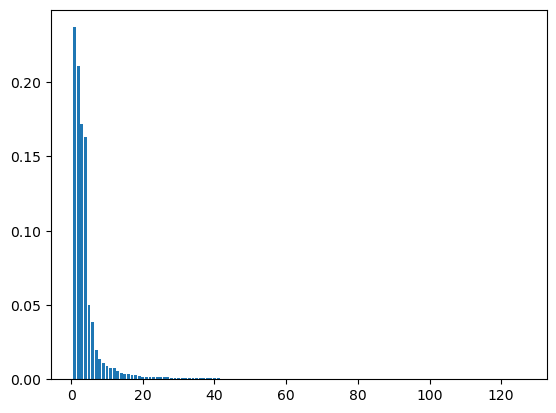

In [124]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.show()

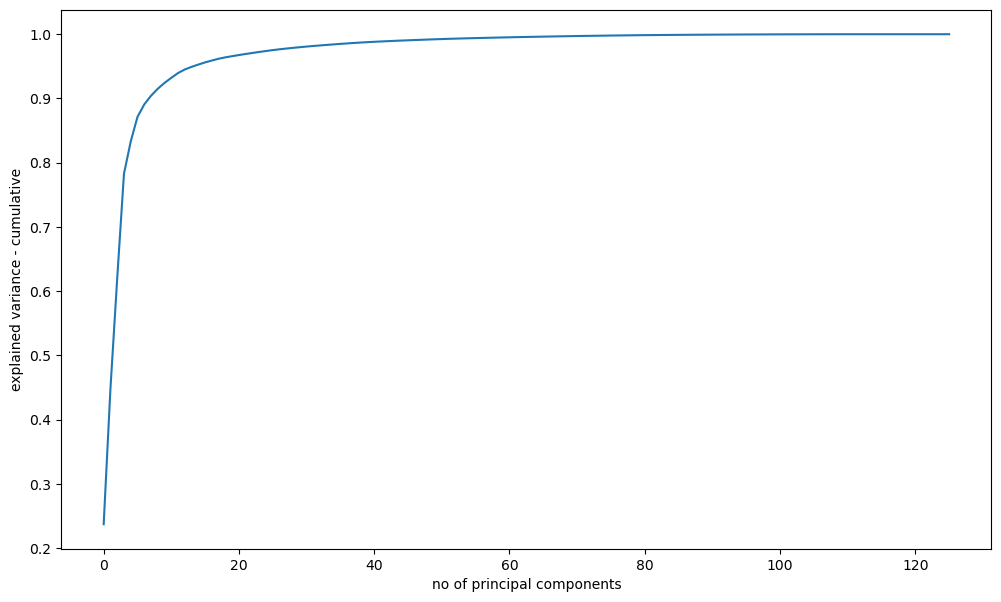

In [125]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# Making a scree plot
fig = plt.figure(figsize=[12,7])
plt.plot(var_cumu)
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

In [126]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

array([23.7, 44.8, 62. , 78.3, 83.3, 87.1, 89. , 90.4, 91.5, 92.4, 93.2,
       93.9, 94.5, 94.9, 95.3, 95.6, 95.9, 96.2, 96.4, 96.6, 96.8, 97. ,
       97.2, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9, 98. , 98.1, 98.2, 98.3,
       98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. , 99.1, 99.2, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3])

The variation in 90% of the data can be explained using 8 Principal Component Analysis (PCA) components.

#### Fitting the dataset using the 8 explainable components.

In [127]:
from sklearn.model_selection import train_test_split
tel1_train, tel1_test, tel2_train, tel2_test = train_test_split(tel1, tel2, train_size=0.8, test_size=0.2, random_state=10)

In [128]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(tel1_train)
pca.components_

array([[ 6.39967580e-02, -3.27062987e-03, -3.67180806e-03, ...,
         2.86321512e-06,  2.85967478e-07, -3.72756954e-08],
       [ 1.40569969e-01,  1.58047594e-01,  1.83874425e-01, ...,
         9.31681730e-06,  8.48028925e-06, -2.38129028e-07],
       [-4.25024562e-02,  1.84968427e-02, -2.20761183e-02, ...,
        -6.66616790e-07,  9.39022656e-07, -9.26712336e-08],
       ...,
       [ 2.72536791e-07,  1.77942215e-06, -3.09534367e-07, ...,
         4.28104418e-05,  1.30712218e-06, -6.69697655e-07],
       [-5.69820296e-08, -3.30469379e-06, -2.82614340e-07, ...,
         5.39592775e-05,  7.23886145e-05, -9.43106039e-05],
       [ 6.09259484e-16,  1.75070440e-15,  1.42780840e-15, ...,
         2.10805626e-15,  5.67508126e-16, -1.80496039e-14]])

In [129]:
pca.explained_variance_ratio_

array([3.88065222e-01, 1.71967189e-01, 9.41866013e-02, 7.80388173e-02,
       5.15549667e-02, 3.47060967e-02, 2.83474332e-02, 1.78552937e-02,
       1.45548868e-02, 1.42735334e-02, 1.34662349e-02, 1.29282456e-02,
       1.16625624e-02, 9.83670860e-03, 6.28364669e-03, 4.80403157e-03,
       4.23999101e-03, 3.91281487e-03, 3.38574842e-03, 3.24486794e-03,
       2.91352052e-03, 2.78819928e-03, 2.20847672e-03, 2.08527836e-03,
       2.05561585e-03, 1.97433087e-03, 1.81884806e-03, 1.77049991e-03,
       1.43820322e-03, 1.24138469e-03, 1.05092752e-03, 1.02329974e-03,
       9.01664595e-04, 8.67361084e-04, 8.19311024e-04, 7.01319695e-04,
       6.16229129e-04, 5.88129017e-04, 5.43465430e-04, 4.86196060e-04,
       4.17949731e-04, 3.75827722e-04, 3.65715244e-04, 3.59196686e-04,
       3.50010826e-04, 3.41980118e-04, 3.32196847e-04, 2.80738776e-04,
       2.64182806e-04, 2.15739754e-04, 1.79835365e-04, 1.58749978e-04,
       1.30598021e-04, 1.16507868e-04, 1.13428487e-04, 9.37005252e-05,
      

In [130]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

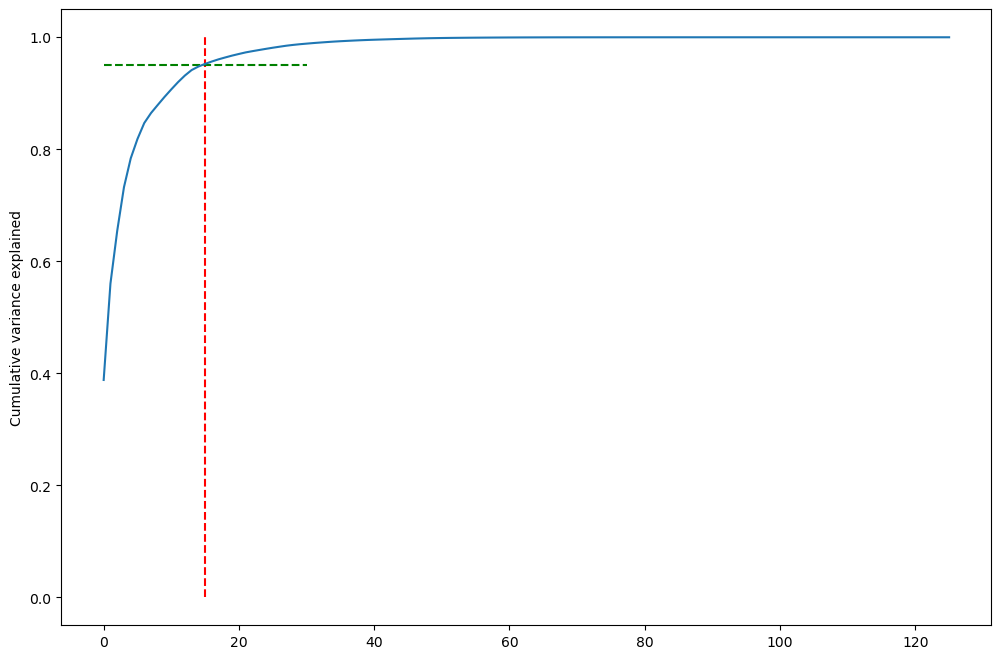

In [131]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

#### For optimal results, we can utilize IncrementalPCA.

In [132]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=16)
df_train_pca = pca_final.fit_transform(tel1_train)
df_train_pca.shape

(24000, 16)

In [133]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [134]:
corrmat.shape

(16, 16)

In [135]:
df_test_pca = pca_final.transform(tel1_test)
df_test_pca.shape

(6001, 16)

In [136]:
from sklearn.linear_model import LogisticRegression
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca, tel2_train)

In [137]:
pred_probs_test = model_pca.predict_proba(df_test_pca)
"{:2.2}".format(metrics.roc_auc_score(tel2_test, pred_probs_test[:,1]))

'0.85'

In [138]:
pred_probs_test1 = model_pca.predict(df_test_pca)
# Confusion matrix
confusion = metrics.confusion_matrix(tel2_test, pred_probs_test1)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(tel2_test, pred_probs_test1))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[5500   34]
 [ 417   50]]
Accuracy:- 0.924845859023496
Sensitivity:- 0.10706638115631692
Specificity:- 0.9938561619082038


In [139]:
pred_probs_train = model_pca.predict_proba(df_train_pca)
"{:2.2}".format(metrics.roc_auc_score(tel2_train, pred_probs_train[:,1]))

'0.84'

In [140]:
pred_probs_train1 = model_pca.predict(df_train_pca)
# Confusion matrix
confusion = metrics.confusion_matrix(tel2_train, pred_probs_train1)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(tel2_train, pred_probs_train1))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[21864   162]
 [ 1797   177]]
Accuracy:- 0.918375
Sensitivity:- 0.08966565349544073
Specificity:- 0.9926450558430945


### Decision Tree with PCA

In [141]:
%pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [142]:
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [143]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
dt = DecisionTreeClassifier(random_state=42)
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split': [50, 150, 50]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(df_train_pca, tel2_train)
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

Fitting 4 folds for each of 75 candidates, totalling 300 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.319145,0.027514,0.004987,0.000705,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 50}",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,1
1,0.294961,0.033389,0.004488,0.000499,2,5,150,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 150}",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,1
2,0.289974,0.027901,0.004239,0.000432,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 50}",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,1
3,0.281746,0.008299,0.003740,0.000432,2,10,50,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 50}",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,1
4,0.300694,0.052766,0.004488,0.000863,2,10,150,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 150}",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,1


In [144]:
score_df.nlargest(5,"mean_test_score")
grid_search.best_estimator_
dt_best = DecisionTreeClassifier( random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=20,
                                  min_samples_split=50)
dt_best.fit(df_train_pca, tel2_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=50,
                       random_state=42)

In [145]:
from sklearn.metrics import confusion_matrix, accuracy_score
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(tel2_train, dt_classifier.predict(df_train_pca)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(tel2_train, dt_classifier.predict(df_train_pca)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(tel2_test, dt_classifier.predict(df_test_pca)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(tel2_test, dt_classifier.predict(df_test_pca)))
evaluate_model(dt_best)

Train Accuracy : 0.9300833333333334
Train Confusion Matrix:
[[21744   282]
 [ 1396   578]]
--------------------------------------------------
Test Accuracy : 0.9118480253291118
Test Confusion Matrix:
[[5400  134]
 [ 395   72]]


### Random Forest with PCA

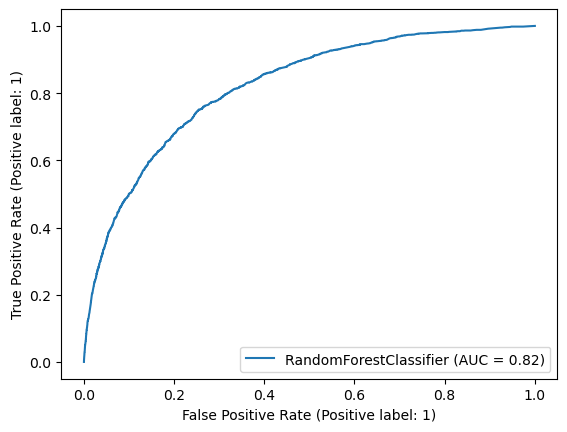

In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay

rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)
rf.fit(df_train_pca, tel2_train)
rf.oob_score_
RocCurveDisplay.from_estimator(rf, df_train_pca, tel2_train)
plt.show()

### Hyper-parameter tuning for the Random Forest

In [147]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5],
    'min_samples_leaf': [50,100],
    'min_samples_split': [ 100, 150, ],
    'n_estimators': [100, 200 ]
}
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(df_train_pca, tel2_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5], 'min_samples_leaf': [50, 100],
                         'min_samples_split': [100, 150],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [148]:
grid_search.best_score_
grid_search.best_params_
rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             n_estimators=200)
rfc_model.fit(df_train_pca, tel2_train)
evaluate_model(rfc_model)

Train Accuracy : 0.91775
Train Confusion Matrix:
[[22026     0]
 [ 1974     0]]
--------------------------------------------------
Test Accuracy : 0.9221796367272121
Test Confusion Matrix:
[[5534    0]
 [ 467    0]]



The best parameters resulted in an accuracy of 91%, which is comparable to the original random forest model's accuracy of around 92%.